# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install numpy pandas matplotlib seaborn -q --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# Write your code here to read the data
file_path = '/content/drive/ai-projects/foodhub_order.csv'  # Read csv file using correct path
df = pd.read_csv(file_path)
# Make copy of df to start the data analysis. This will help us not messing with the original copy by mistake
df_foodhub = df.copy()

In [ ]:
# Write your code here to view the first 5 rows
# Display the first few rows to understand the structure of the dataset
print("Dataset Overview:")
df_foodhub.head()

Dataset Overview:


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#df_foodhub.shape returns a tuple (num_rows, num_columns)
num_rows, num_columns = df_foodhub.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")
#Note: df_foodhub.info() can be used to get the info of no. of rows and columns

The dataset contains 1898 rows and 9 columns.


#### **Observations:**
The dataset has 1,898 entries (rows) and 9 features (columns).


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
'''
This question can be answered in two ways :
  a) using info() function and
  b) dtypes property (attribute)
The best one is the info() function because it provides more insight into the dataset than the dtypes property.

Using ANSI Escape Codes for formating purpose which works in most terminals otherwise rich library need to be installed for text formatting .
# \033[1;4m - Enables bold (1) and underline (4)
# \033[0m - Resets formatting
'''

# Display basic information about the dataset which also include columns and its datatypes
# Output shows float64(1 column), int64(4 columns), and object(4 columns) datatypes
print("\n\033[1mDataset Information (using info() function):\033[0m")
print(df_foodhub.info())

# Display the datatypes of the columns using dtypes property of a pandas dataframe. This will display columns and its datatype info
print("\n\n\033[1;4mDataset - Data Types Information (using info() function):\033[0m")
print(df_foodhub.dtypes)


Dataset Information (using info() function):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


Dataset - Data Types Information (using info() function):
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_ord

#### **Observations:**

##### Dataset Overview:
1.   The dataset contains 1,898 rows and 9 columns.
2.   There are no missing values, as all columns have 1,898 non-null entries.

##### Key Insights:
*   4 numerical columns (int64 and float64): order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time.

*   4 categorical columns (object type): restaurant_name, cuisine_type, day_of_the_week, and rating.

*   The rating column is stored as an object type, which suggests it might contain non-numeric values (e.g., "Not Rated" or missing data). In the next question we can find it more.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
'''
To check for missing values and handle them appropriately, follow these steps:
Step 1: Check for Missing Values in each Column
Step 2: Handle Missing Values Appropriately If Exists
Step 3: Verify that Missing Values are Handled
'''

# This will display the count of missing values in each column.
missing_values = df_foodhub.isnull().sum()

# Display missing values count
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### **Observations Based on the Missing Values Check:**

*   **No Missing Data:**
	*   The dataset is completely clean with no missing values across any of the 9 columns (order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time).

	*   This means no data imputation or cleaning is required in terms of missing values.

*   **Data is Ready for Analysis:**
	*   Since all records are complete, we can proceed directly with Exploratory Data Analysis (EDA), Outlier Detection, and Data Visualization.

	*   This includes checking for trends in order cost, restaurant popularity, delivery times, and rating distributions.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the statistical summary of the dataset
statistical_summary = df_foodhub.describe()

# Display the summary
print('Statistical summary of the data\n',statistical_summary)
print('\nRequested time info for food to be prepared once an order is placed:')
print('Minimum time:',df_foodhub['food_preparation_time'].min())
print('Average time:',df_foodhub['food_preparation_time'].mean())
print('Maximum time:',df_foodhub['food_preparation_time'].max())

Statistical summary of the data
            order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  

Requested time info for food to be pre

###**Observations Based on the Statistical Summary:**

**1. Order ID and Customer ID**
*   Order IDs and Customer IDs are numeric but not useful for analysis (since they are just unique identifiers).
*   Customer ID values range from 1,311 to 405,334, indicating a large customer base.
*   The standard deviation of Customer IDs is quite large (113,698.14), which suggests a wide spread in customer ordering patterns.


**2. Cost of the Order**

*   **Mininum Cost**: \$4.47 |  **Maximum Cost**: \$35.41
*   **Mean (Average) Cost**: \$16.50 |  **Standard Deviation**: \$7.48 (indicates variability in order amounts) | **Median Cost** (50% percentile): \$14.14
*   75% of orders are below \$22.30, while the highest order is \$34.41
*   **Interpretation**:
	*   Most orders are within the \$12-\$22 range, but a few high-value orders increase the max value to \$35.41.
	*   The distribution could be right-skewed, meaning a few expensive orders pull the average up.

**3. Food Preparation Time**
*   **Minimum Prep Time**: 20 minutes | **Maximum Prep Time**: 35 minutes | **Average Prep Time**: ~27.37 minutes | **Standard Deviation**: 4.63 minutes
*   25% of orders take less than 23 minutes, while 75% take less than 31 minutes.
*   **Interpretation:**
	*   The majority of food orders are prepared within 20 to 35 minutes.
	*   The standard deviation is low, indicating that food preparation time is consistent with no extreme variations.

**4. Delivery Time**
*   **Minimum Delivery Time**: 15 minutes | **Maximum Delivery Time**: 33 minutes | **Average Delivery Time**: 24.16 minutes | **Standard Deviation**: 4.97 minutes
*   50% of deliveries take 25 minutes or less, while 75% are within 28 minutes.
*   **Interpretation:**
	*   Delivery times are mostly between 20 and 28 minutes, with a few orders taking up to 33 minutes.
	*   Standard deviation is relatively low, suggesting that delivery time is fairly predictable and stable.
	*   There could be a slight skewness due to some longer delivery times (max 33 minutes).

  
**Conclusion:**
1.   Food preparation and delivery times are quite consistent across all orders, with most orders prepared within 20-35 minutes and delivered within 15-33 minutes.
2.   Order costs show more variation than preparation or delivery times, with a right-skewed distribution (a few expensive orders pulling up the average).
3.   No extreme outliers in food preparation and delivery times, meaning the service is stable and reliable.
4.   If optimizing operations, reducing prep and delivery times slightly (by a few minutes) could help improve efficiency.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
'''
In order to pick the not rated orders, it is important check the data which represents the "not rated"
Therefore using the unique function can help to find the distinct values inside the rating column.
Eg. df_foodhub["rating"].unique()
Output -> ['Not given' '5' '3' '4']

It means 'Not given' is a right choice of data value to check for not rated orders to solve the question #5
Note: The df_foodhub["rating"].value_counts(dropna=False) can be used, but it will change the 'Not given' value to 'NaN'
      Therefore ignoring this technique.
'''
# find the distinct values inside the rating column and pick the data value used for not rated orders
print('Distinct values inside rating column:',df_foodhub["rating"].unique())

# Count the number of not rated orders
not_rated_orders = (df_foodhub["rating"] == "Not given").sum()

# Display not rate counts
print(f"\nNumber of orders that are not rated (i.e. rating is not given): {not_rated_orders}")

Distinct values inside rating column: ['Not given' '5' '3' '4']

Number of orders that are not rated (i.e. rating is not given): 736


####**Observations on Unrated Orders** *(736 Orders Not Rated)*


* **Percentage of Unrated Orders:**
	*   Since there are 1,898 total orders and 736 orders are not rated, the percentage of unrated orders is 38.78%.
	*   This means that nearly 39% of all orders did not receive a rating.
	*   A significant portion of customers chose not to rate their experience.

* **Possible Reasons for Unrated Orders:**
	*   Customer Indifference: Some customers might not feel the need to leave a rating unless the experience was exceptionally good or bad.
	*   Neutral or Average Experience: If an order was neither very good nor very bad, customers might skip rating it.
	*   Service Issues: Delays in food preparation or delivery might discourage customers from engaging with the rating system.
	*   Lack of Incentives to Rate: Customers may not be motivated to leave a rating unless prompted with a reward (e.g., discounts for feedback).
	*   First-Time or One-Time Customers: New customers or one-time buyers might be less engaged in providing feedback.

* **EDA - Univariate and Multivariate Analysis on Unrated Orders:**
	*   Univariate Analysis and Multivariate Analysis can analyze the dataset to understand its distribution, patterns, or outliers.
	*   Understanding the distribution of a single variable and find relationships between multiple variables can help us to explore and get more insight on unrated orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Before writing code it is essential to identify the variables for Univariate Analysis. In our FoodHub dataset we have following types of variables and below table shows associated type, analysis technique (plot selection), and their purpose.

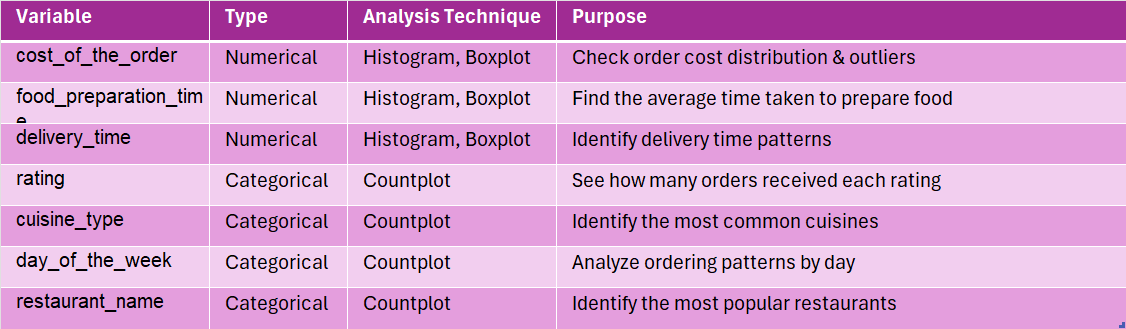


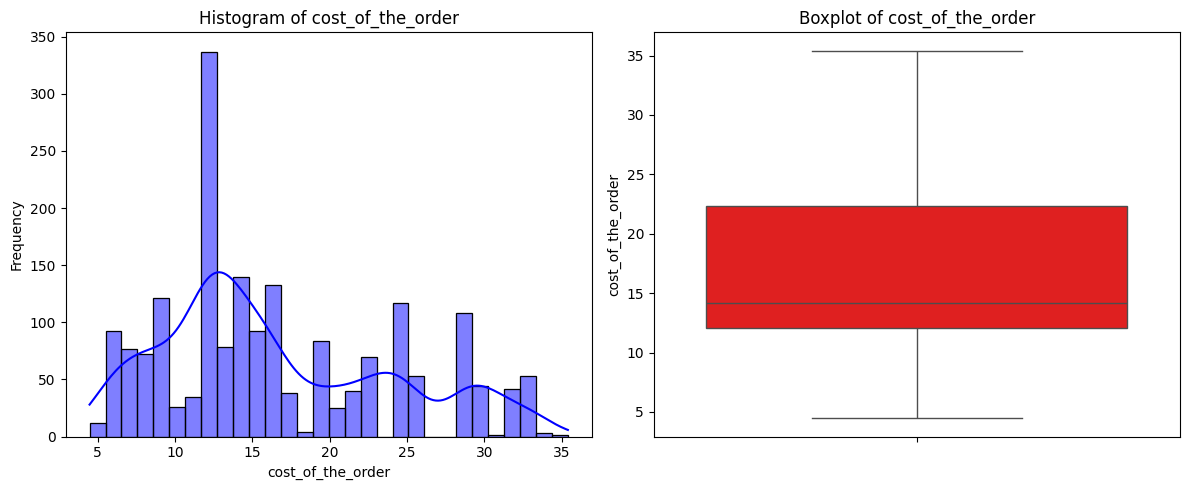

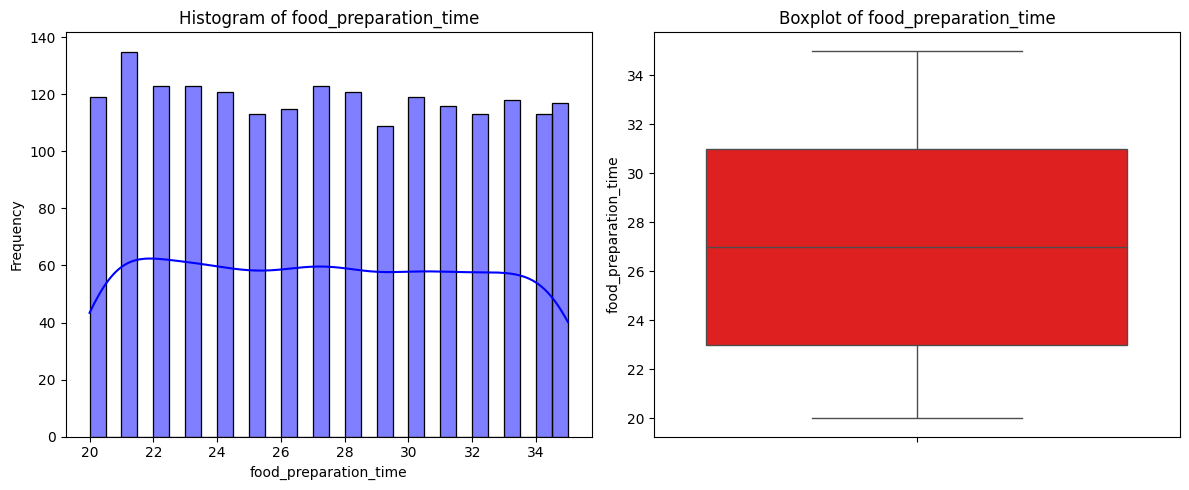

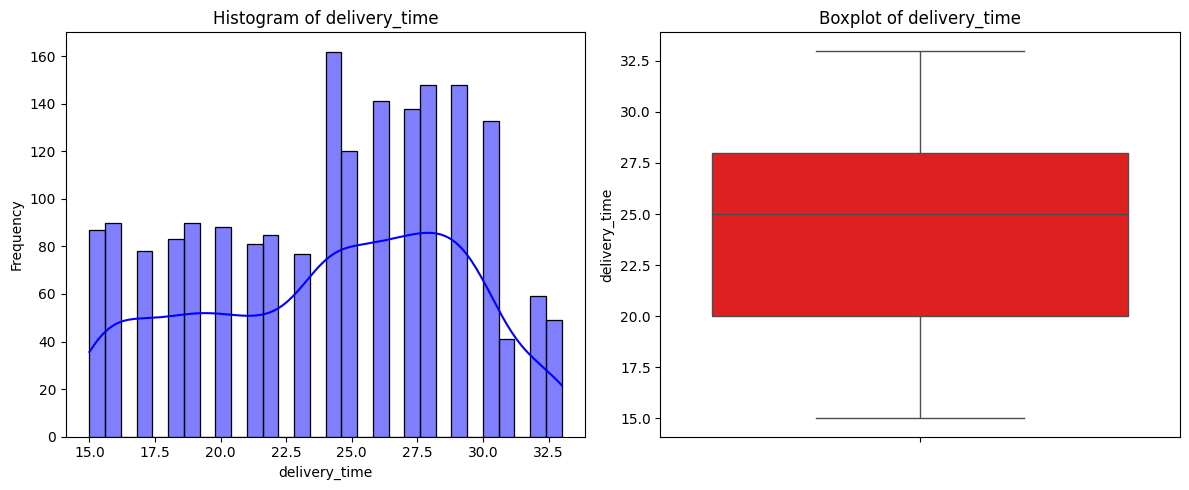

In [ ]:
# Univariate Analysis for Numerbical Variables (Histogram and Boxplot)
# Histograms are used to see data distribution
# Bboxplots are used to detect outliers
def draw_histograms_boxplots(df_plot, column):
    """
    Draws a histogram and boxplot for a specified numerical column of a DataFrame.

    Args:
    df_plot (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the numerical column to plot.

    Returns:
    None
    """
    # Creating a figure and the axes objects for the histogram and boxplot subplots
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df_plot[column], bins=30, kde=True, color="blue", ax=ax_hist)
    ax_hist.set_title(f"Histogram of {column}")
    ax_hist.set_xlabel(column)
    ax_hist.set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(y=df_plot[column], color="red", ax=ax_box)
    ax_box.set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

# Define numerical columns
numerical_columns = ["cost_of_the_order", "food_preparation_time", "delivery_time"]

# Loop through columns to create plots
for column in numerical_columns:
    draw_histograms_boxplots(df_foodhub, column)

#### **Observation on the Histogram and Boxplot of Cost of the Order**
*   Histogram: The distribution is right-skewed, meaning most orders fall between \$10-\$20, but a few higher-cost orders exist.
*   Boxplot: No extreme outliers, but some higher-cost orders (~\$35) suggest variability in pricing.

#### **Observation on the Histogram and Boxplot of Food Preparation Time**
*  Histogram: The distribution appears uniform, meaning food preparation time is evenly spread between 20 and 35 minutes.
*  Boxplot: No major outliers, indicating consistent food preparation times across all orders.

#### **Observation on the Histogram and Boxplot of Delivery Time**
*  Histogram: Slight right skew, meaning most deliveries take between 20-28 minutes, but some go up to 32+ minutes.
*  Boxplot: No extreme outliers, suggesting a fairly consistent delivery time distribution.


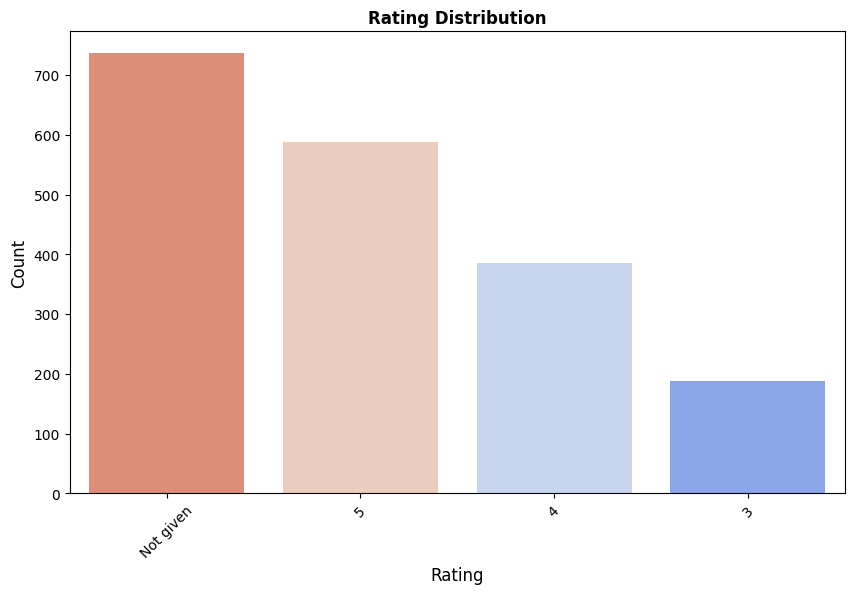

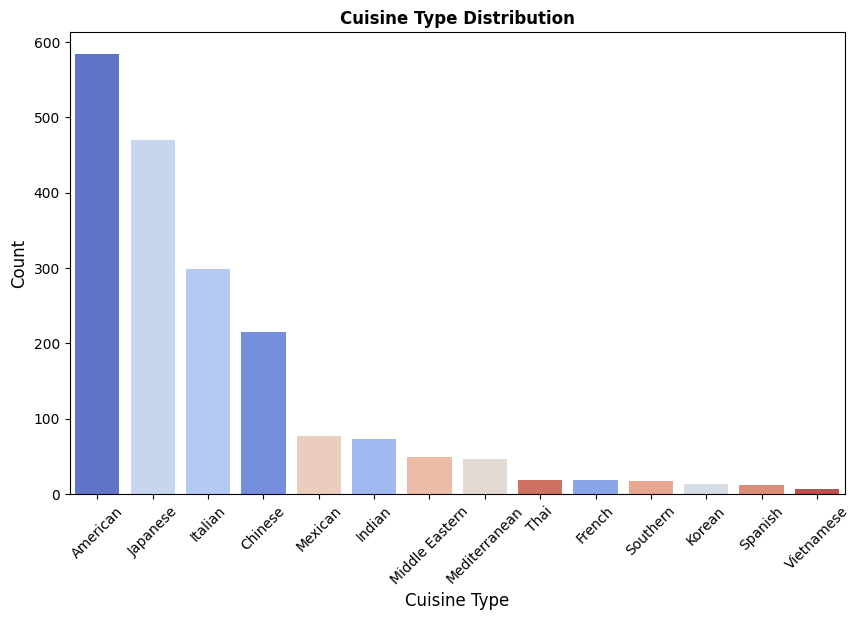

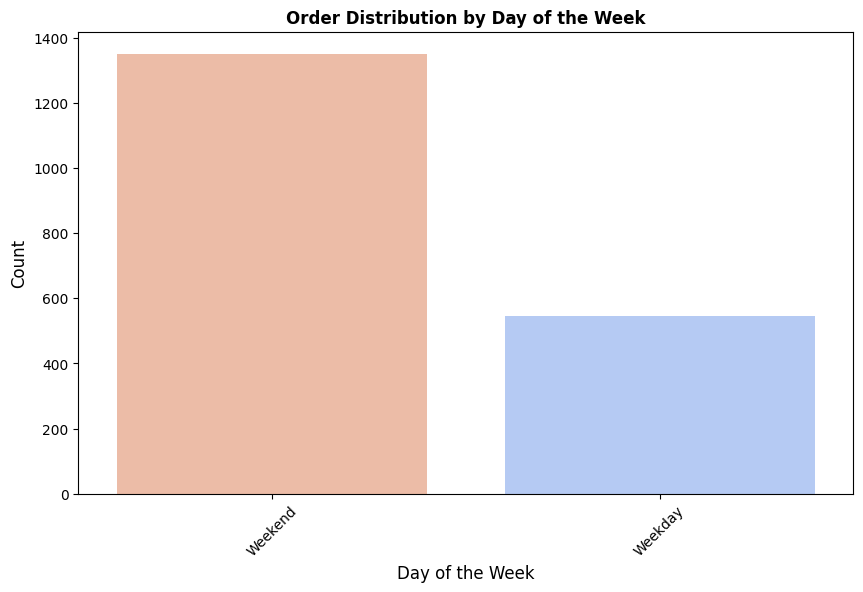

In [ ]:
"""
  Univariate Analysis for Categorical Variables (Countplot)
  Draws a countplot for the following categorical variables of a FoodHub DataFrame.
  i. rating
  ii. cuisine_type
  iii. day_of_the_week

  NOTE: restaurant_name excluded from counterplot as it has too many unique values (i.e., high cardinality).
  It would clutter the plot and make it hard to read.
  Therefore, we should analyze only the Top 10 Restaurants using barplot for better visualization
"""

# Created User-defined-function to draw the count plot.
# This can re-used as needed for any of the questions
def draw_countplot(df_plot, col, title, xlabel, ylabel):
    '''
    Draw a count plot using Seaborn.
    Parameters:
    - df_plot (pandas.DataFrame): The DataFrame containing the data.
    - col (str): The column to plot.
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    Returns:
    - None
    '''
    plt.figure(figsize=(10, 6))
    #Order is to order the visual data for better understanding
    order = df_plot[col].value_counts().index
    sns.countplot(x=df_plot[col], hue=df_plot[col], palette="coolwarm", order=order, legend=False)
    plt.xticks(rotation=45)
    plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.xlabel(xlabel, fontdict={'fontsize':12})
    plt.ylabel(ylabel, fontdict={'fontsize':12})
    plt.show()

# Define dictinary of categorical columns along with other associated custom plot variables
categorical_info ={
    "categorical_columns": ["rating", "cuisine_type", "day_of_the_week"],
    "title": ["Rating Distribution", "Cuisine Type Distribution", "Order Distribution by Day of the Week"],
    "xlabel": ["Rating", "Cuisine Type", "Day of the Week"],
    "ylabel": ["Count", "Count", "Count"]
}

for col, title, xlabel, ylabel in zip(categorical_info['categorical_columns'], categorical_info['title'], categorical_info['xlabel'], categorical_info['ylabel']):
  # Convert categorical columns to category dtype
  # In the large dataset this reduces memory usage significantly
  df_foodhub[col] = df_foodhub[col].astype("category")
  #Call user-define-function draw_countplot to draw the plot
  draw_countplot(df_plot=df_foodhub, col= col, title =title, xlabel=xlabel, ylabel=ylabel)
  print(f"\n\n")

#### **Observation on the Countplot of Categorical Variables (rating, cusine_type and day_of_the _week)**
*   **Rating Distribution:** Countplot of Rating
	*   The majority of the data has the rating "Not given," followed by a noticeable count of orders with a rating of 5.
	*   Ratings of 4 and 3 have fewer occurrences, indicating lower-rated orders or perhaps less feedback for certain orders.
	*   Takeaway: This suggests that customers may be less likely to provide ratings, and when ratings are provided, they tend to be higher.


*   **Cuisine Type Distribution:** Countplot of Cuisine Type
	*   American cuisine leads by a large margin in terms of the number of orders, followed by Japanese, Italian, and Chinese cuisines.
	*   Other cuisines like Middle Eastern, French, and Spanish have much lower counts, with Vietnamese and other niche types being even less frequent.
	*   Takeaway: American, Japanese, and Italian cuisines are clearly the most popular, with diverse tastes seen in the other cuisines but in smaller proportions.


*   **Order Distribution by Day of the Week:** Countplot of Day of the Week
	*   The majority of the orders are placed during the weekend, with weekday orders being significantly fewer.
	*   Takeaway: This indicates higher demand during weekends, which could be crucial for inventory and staffing decisions.


**Conclusion:**

* Encouraging customers to rate could provide better feedback for service improvement.
* American, Japanese, and Italian cuisines dominate orders, restaurants should focus on these categories for marketing.
* Peak demand is on weekends, restaurants and delivery services should optimize staffing for weekend efficiency.

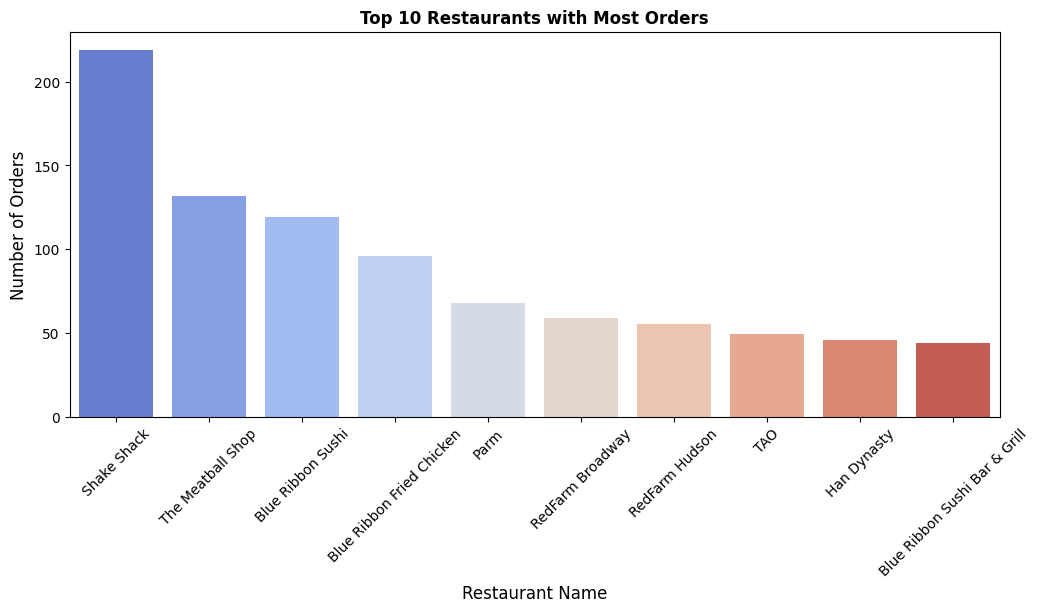

In [ ]:
'''
  Since "restaurant_name" has too many unique values, we are finding the Top 10 Restaurants with Most Orders.
  Only plot those top 10 in a countplot
'''

#Custom Barplot User-Defined-Function
def draw_barplot(df_plot, x_col, y_col, title, x_label, y_label):
  '''
    Draw a bar plot using Seaborn.
    Parameters:
    - df_plot (pandas.DataFrame): The DataFrame containing the data.
    - x_col (str): The column to use for the x-axis.
    - y_col (str): The column to use for the y-axis.
    - title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    Returns:
    - None
  '''
  # Plot Top 10 Restaurants
  plt.figure(figsize=(12, 5))
  sns.barplot(x=x_col, y=y_col, hue=x_col, data=df_plot, palette="coolwarm", legend=False)

  plt.xticks(rotation=45)  # Rotate labels for better readability
  plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'}) #Update custom title
  plt.xlabel(x_label, fontdict={'fontsize':12}) #Update custom label
  plt.ylabel(y_label, fontdict={'fontsize':12}) #Update custom label
  plt.show()

# Get Top 10 Restaurants by Order Count
top_restaurants = df_foodhub["restaurant_name"].value_counts().nlargest(10)

# Convert to DataFrame for Seaborn compatibility
top_restaurants_df = top_restaurants.reset_index()
top_restaurants_df.columns = ["restaurant_name", "order_count"]

# Draw plot usig UDF function
draw_barplot(top_restaurants_df, "restaurant_name", "order_count", "Top 10 Restaurants with Most Orders", "Restaurant Name", "Number of Orders")

#### **Observation on the Barplot of Top 10 Restaurants**
*   Shake Shack dominates the plot, with over 200 orders, significantly higher than the other restaurants.
*   The Meatball Shop & Blue Ribbon Sushi follow as the next most popular restaurants.
*   Order volume drops significantly after the top 3, indicating a concentration of demand.
*   Lower-ranked restaurants (6-10) have similar order counts, making them competitive.
*   RedFarm & Blue Ribbon appear multiple times, suggesting strong brand presence.

**Conclusion:**
*   Shake Shack is the clear leader in terms of orders, which could reflect its brand strength or customer preference.
*   The remaining restaurants show a more balanced but lower demand, indicating the potential for targeted marketing or special promotions to boost orders at these locations.
*   For strategic decisions, Shake Shack might be considered a key focus for analysis, but opportunities for growth exist among other restaurants with moderate to low order counts.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get Top 10 Restaurants by Order Count as a series
top_5_restaurants = df_foodhub["restaurant_name"].value_counts().nlargest(5)

# Convert to DataFrame and Rename Columns display the proper columns
top_5_restaurants_df = top_5_restaurants.reset_index()
top_5_restaurants_df.columns = ["restaurant_name", "number_of_orders"]

print("Top 5 restuarants in terms of the number of orders receieved: ")
print(top_5_restaurants_df)



Top 5 restuarants in terms of the number of orders receieved: 
             restaurant_name  number_of_orders
0                Shake Shack               219
1          The Meatball Shop               132
2          Blue Ribbon Sushi               119
3  Blue Ribbon Fried Chicken                96
4                       Parm                68


#### **Observations:**
*   Shake Shack is the most popular restaurant with 219 orders, significantly ahead of others.
*   The Meatball Shop (132 orders) and Blue Ribbon Sushi (119 orders) are also in high demand.
*   Blue Ribbon Fried Chicken (96 orders) follows, indicating the Blue Ribbon brand is well-received.
*   Parm (68 orders) ranks 5th but has a noticeably lower order count compared to the top 3.
*   Order volume drops significantly after the top restaurant, showing high customer concentration at Shake Shack.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter data for orders placed on weekends
weekend_orders = df_foodhub[df_foodhub["day_of_the_week"] == "Weekend"]

# Count the number of orders for each cuisine type on weekends
popular_cuisine_weekend = weekend_orders["cuisine_type"].value_counts().idxmax()

# Display the most popular cuisine on weekends
print(f"The most popular cuisine on weekends is: {popular_cuisine_weekend}")


The most popular cuisine on weekends is: American


#### **Observation: Most Popular Cuisine on Weekends**
*   American cuisine is the most popular choice on weekends, indicating high customer preference.
*   This suggests that customers tend to order familiar, comfort food during weekends.
*   Possible reasons for its popularity could include fast food options, casual dining appeal, or family-friendly meals.
*   Restaurants offering American cuisine should optimize inventory and staffing for weekends to handle increased demand.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
'''
  The Question 9 does not specify the the percentage of orders on any variable(s)
  so we are considering the percentage of orders on over-all orders.
'''
# Calculate total number of orders
total_orders = len(df_foodhub)

# Count the number of orders where cost_of_the_order is greater than 20 dollars
orders_above_20 = len(df_foodhub[df_foodhub["cost_of_the_order"] > 20])

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Display the result
print(f"Percentage of orders that cost more than $20: {percentage_above_20:.2f}%")


Percentage of orders that cost more than $20: 29.24%


#### **Observations: Orders above \$20**

*   29.24% of orders cost more than \$20, meaning nearly 1 in 3 orders falls in the higher price range.
*   The majority (around 70% of orders) cost \$20 or less, indicating that most customers prefer lower-cost meals.
*   Higher-priced orders may include premium meals, bulk orders, or specialty items.
*   Restaurants can analyze customer behavior to offer discounts or promotions for high-value orders to encourage spending above $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean (average) delivery time
mean_delivery_time = df_foodhub["delivery_time"].mean()

# Display the result
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### **Observations: Mean (Average) Order Delivery Time**

*   **The average delivery time is 24.16 minutes**, indicating a **fairly quick delivery process**.
*   This suggests that most orders are delivered within a reasonable timeframe, likely keeping customers satisfied.
*   If this aligns with expected delivery timeframes, service efficiency is good.
*   To improve, restaurants could analyze peak hours or slow delivery cases to further reduce delays.
*   If orders taking much longer exist, outlier detection could help identify issues with specific restaurants or locations.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identify the top 3 most frequent customers based on order count
top_customers = df_foodhub["customer_id"].value_counts().nlargest(3)

# Convert to DataFrame and rename columns for better readability
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ["Customer ID", "Number of Orders"]

# Display the top 3 customers
top_customers_df


,Customer ID,Number of Orders
0,52832,13
1,47440,10
2,83287,9


#### **Observations:**

*   Customer ID 52832 is the most frequent customer,placing 13 orders.
*   Customer ID 47440 (10 orders) and Customer ID 83287 (9 orders) follow closely.
*   These customers have high engagement, making them ideal for the 20% discount vouchers.
*   Offering incentives may boost loyalty and encourage repeat purchases.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Let start the multivariate analysis by finding the correlation between the numeric variables of foodhub dateset. It helps understanding relationships among variables and detecting multicollinearity

In [ ]:
#Get the correction of numeric columns for the analysis
numeric_df = df_foodhub.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


#### **Observation:** FoodHub DataSet Correlations

* **order_id:** Shows very weak correlations with all other variables. This is expected, as order IDs are typically arbitrary identifiers.

* **customer_id:** Similar to order_id, it shows very weak correlations with other variables. Customer IDs are also generally arbitrary identifiers.

* **cost_of_the_order:** Has a slightly stronger (but still weak) positive correlation with food_preparation_time (0.041527) and a weak positive correlation with order_id (0.021171). It has a weak negative correlation with delivery_time (-0.029949).

* **food_preparation_time:** As mentioned, has a weak positive correlation with cost_of_the_order. It also has a very weak positive correlation with delivery_time (0.011094) and weak negative correlation with customer_id (-0.030330).

* **delivery_time:** Shows weak negative correlations with cost_of_the_order and customer_id. It has a very weak positive correlation with food_preparation_time.

Multivariate Analysis section is using Bivariate analysis(having two variables) and Multivariate Aanalysis (having more than two variables). ***Find the list of distribution based on variable(s) will be used to plot for the foodhub analysis.***

#### Bivariate Analysis (BA):

---

##### **BA(1). Order Cost vs. Delivery Time**
* **Goal:** Check if larger orders tend to take longer delivery times. This could indicate that bigger orders require more preparation or special handling.

##### **BA(2). Order Cost vs. Food Preparation Time**
* **Goal:** Investigate if larger or more expensive orders require more time for preparation.

##### **BA(3). Order Cost Range vs. Rating**
* **Goal:** Investigate if there’s a relationship between the cost of an order and the customer’s rating. This might reveal if more expensive orders receive higher or lower ratings.

##### **BA(4). Delivery Time vs. Food Preparation Time**
* **Goal:** Explore how the preparation time for food impacts delivery time. If food takes longer to prepare, does it result in a longer delivery time?

##### **BA(5). Day of the Week vs. Delivery Time**
* **Goal:** Investigate if deliveries tend to be faster or slower on specific days of the week, which could reveal trends related to demand or logistics.

##### **BA(6). Restaurant Name (Top 5 + Bottom 5) vs. Delivery Time**
* **Goal:** Explore whether certain restaurants tend to have longer or shorter delivery times, which could inform operational adjustments.

  *Note: DataSet has too many restaurants so we will consider top 5 + bottom 5 restaurants by delivery time for the analysis.*

##### **BA(7). Cuisine Type vs. Cost of the Order**
* **Goal:** Check if the type of cuisine influences the cost of the order. For instance, some cuisines may tend to be more expensive than others.

##### **BA(8). Rating Distribution by Day of the Week**
* **Goal:** Examine if customers tend to give higher or lower ratings on certain days of the week, potentially linked to delivery quality or customer satisfaction.


####Multivariant Analysis (MA):

---

##### **MA(1). Correlation Analysis Between Numerical Variables**
* **Goal:** Identify relationships between cost_of_the_order, food_preparation_time, and delivery_time.

##### **MA(2). Delivery Time Distribution by Day of the Week Across Order Cost Ranges**: Boxplot of Delivery Time, Day of the Week, and Order Cost
* **Goal:** Explore how delivery times vary by the day of the week and cost ranges.

##### **MA(3). Order Cost Distribution by Cuisine Type and Rating**: Boxplot of Order Cost, Cuisine Type and Rating
* **Goal:** Compare order costs for different cuisines and see how ratings are distributed.

##### **MA(4). Delivery Time Distribution by Order Cost, and Rating**: Pairplot of Delivery Time, Order Cost, and Rating
* **Goal:** Analyze the relationship between delivery time, cost, and customer ratings.

##### **MA(5). Combined Time (Preparation + Delivery) Distribution by Cuisine Type**: Boxplot of Food Preparation Time + Delivery Time and Cuisine Type
* **Goal:** Analyze how long it takes for food (cuisine) from preparation to delivery, considering both times.

##### **MA(6). Average Order Cost Distribution by Cuisine Type and Day of the Week**: Heatmap of Average Order Cost, Cuisine Type and Day of the Week
* **Goal:** Examine if customers spend more on specific cuisines during certain days.

##### **MA(7). Food Preparation Time and Delivery Time vs Rating using Boxplot**:
* **Goal:** Explore if longer preparation or delivery times lead to lower ratings.

##### **MA(8). Customer ID, Order Cost, and Rating using Barplot**
* **Goal:** Identify spending patterns of top five customers and their satisfaction levels based on order frequency.


In [ ]:

def set_plot_labels(title, x_label, y_label, plot_show= True, rotate_45 = False):
    """Sets the title and labels for a matplotlib plot.

    Parameters:
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    plot_show (bool): Whether to show the plot after setting labels. Default is True.
    rotate_45 (bool): Whether to rotate x-axis labels for better readability. Default is False.

    Returns:
    None
    """
    plt.title(title, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    # Rotate x-axis labels for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    if(rotate_45):
      plt.xticks(rotation=45)
    plt.tight_layout()
    # Show the plot
    if(plot_show):
      plt.show()



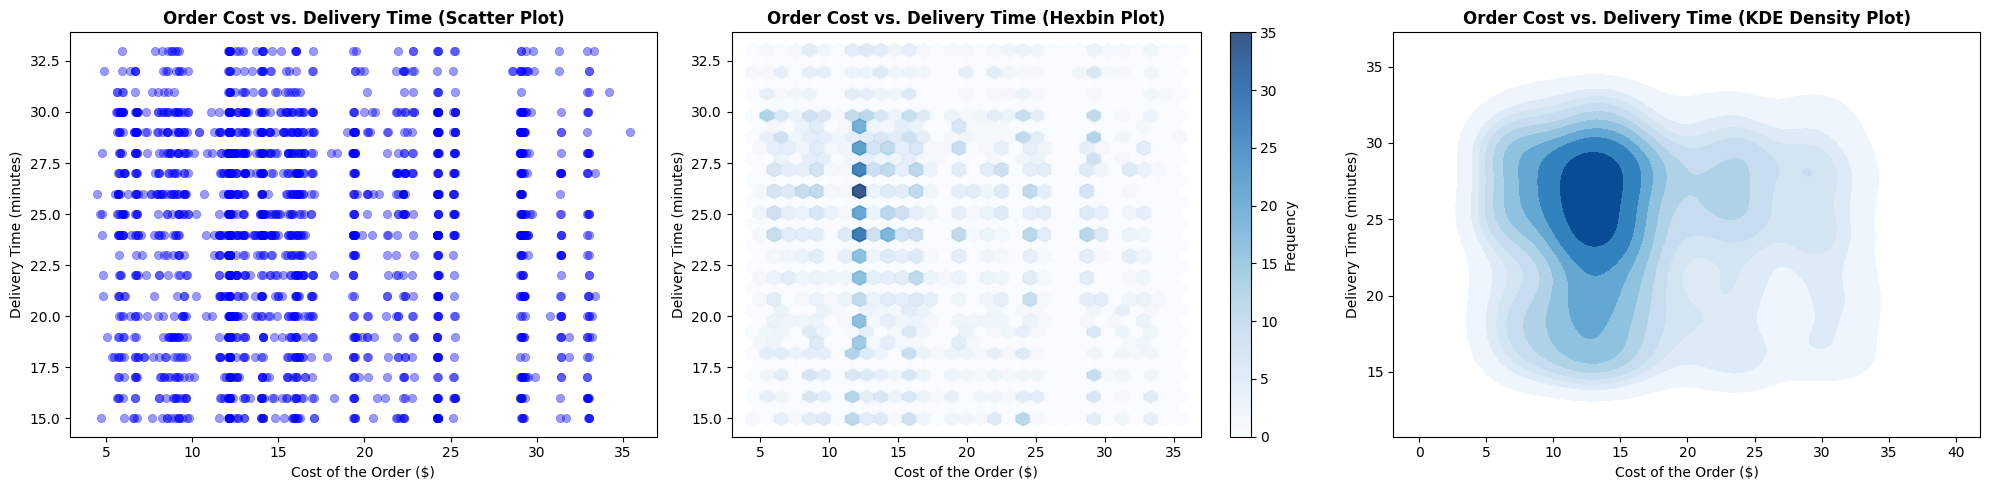

In [ ]:
'''
  BA(1). Relationship Between Order Cost & Delivery Time
  Goal: Check if expensive orders take longer to deliver.

  Note: Scatter Plot (Order Cost vs. Delivery Time) is highly cluttered with overlapping points,
  making it difficult to identify trends. Therefore, using hexbin and kdeplot
  for more informative visualizations.
'''
def create_order_cost_with_time_plots(df_plot, cost_column, delivery_or_prep_time_column, title, x_label, y_label, color = 'blue'):
    '''
    Create and display both scatter, hexbin, and KDE plots for Order Cost vs Delivery Time.
    Parameters:
    df_plot (pandas.DataFrame): The DataFrame containing the data.
    cost_column (str): The name of the column representing the order cost.
    delivery_time_column (str): The name of the column representing the delivery time.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    Returns:
    None
    '''

    #extract colors
    plot_color = color
    plot_cmap= "Blues"

    if(plot_color.lower()=="red"):
      plot_color = "red"
      plot_cmap= "Reds"
    elif(plot_color.lower()=="orange"):
      plot_color = "orange"
      plot_cmap= "Oranges"
    elif(plot_color.lower()=="green"):
      plot_color = "green"
      plot_cmap= "Greens"
    elif(plot_color.lower()=="purple"):
      plot_color = "purple"
      plot_cmap= "Purples"
    else:
      plot_color = "blue"
      plot_cmap= "Blues"

    # Create a figure with three subplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Scatter Plot
    sns.scatterplot(x=df_plot[cost_column], y=df_plot[delivery_or_prep_time_column], alpha=0.4, color= plot_color, edgecolor=None, ax=axes[0])
    axes[0].set_title(f"{title} (Scatter Plot)", fontdict={'fontweight':'bold'})
    axes[0].set_xlabel(f'{x_label}')
    axes[0].set_ylabel(f'{y_label}')

    # Hexbin Plot
    hb = axes[1].hexbin(df[cost_column], df_plot[delivery_or_prep_time_column], gridsize=30, cmap=plot_cmap, alpha=0.8)
    axes[1].set_title(f"{title} (Hexbin Plot)", fontdict={'fontweight':'bold'})
    axes[1].set_xlabel(f'{x_label}')
    axes[1].set_ylabel(f'{y_label}')
    fig.colorbar(hb, ax=axes[1], label="Frequency")

    # KDE Density Plot
    sns.kdeplot(x=df[cost_column], y=df_plot[delivery_or_prep_time_column], cmap=plot_cmap, fill=True, ax=axes[2])
    axes[2].set_title(f"{title} (KDE Density Plot)", fontdict={'fontweight':'bold'})
    axes[2].set_xlabel(f'{x_label}')
    axes[2].set_ylabel(f'{y_label}')


    # Show the combined plots
    plt.tight_layout()
    plt.show()

#Create Order Cost Distrubution by Delivery Time
create_order_cost_with_time_plots(df_foodhub, "cost_of_the_order", "delivery_time", "Order Cost vs. Delivery Time", "Cost of the Order ($)", "Delivery Time (minutes)")

#### **Observation:** Order Cost vs. Delivery Time

1. **Scatter Plot:** The scatter plot shows a mixed distribution, with no clear linear relationship between Order Cost and Delivery Time. While some high-cost orders seem to have varying delivery times, no significant correlation or trend is observed.

2. **Hexbin Plot:** The hexbin plot suggests that most of the orders are clustered in the lower-cost range with shorter delivery times. As the Order Cost increases, the density of points reduces, and the relationship between cost and delivery time appears to be scattered without any clear concentration.

3. **KDE Plot:** The KDE plot gives a smoother view, showing some areas where higher costs tend to align with specific delivery time ranges. However, there’s no strong peak or pattern that strongly links higher-order costs to longer delivery times.

**Conclusion:**

* None of these plots indicate a strong, direct relationship between Order Cost and Delivery Time. While there are some trends, such as higher-cost orders appearing with varying delivery times, the overall patterns are dispersed. Further analysis could involve exploring other variables to uncover factors that affect delivery times.


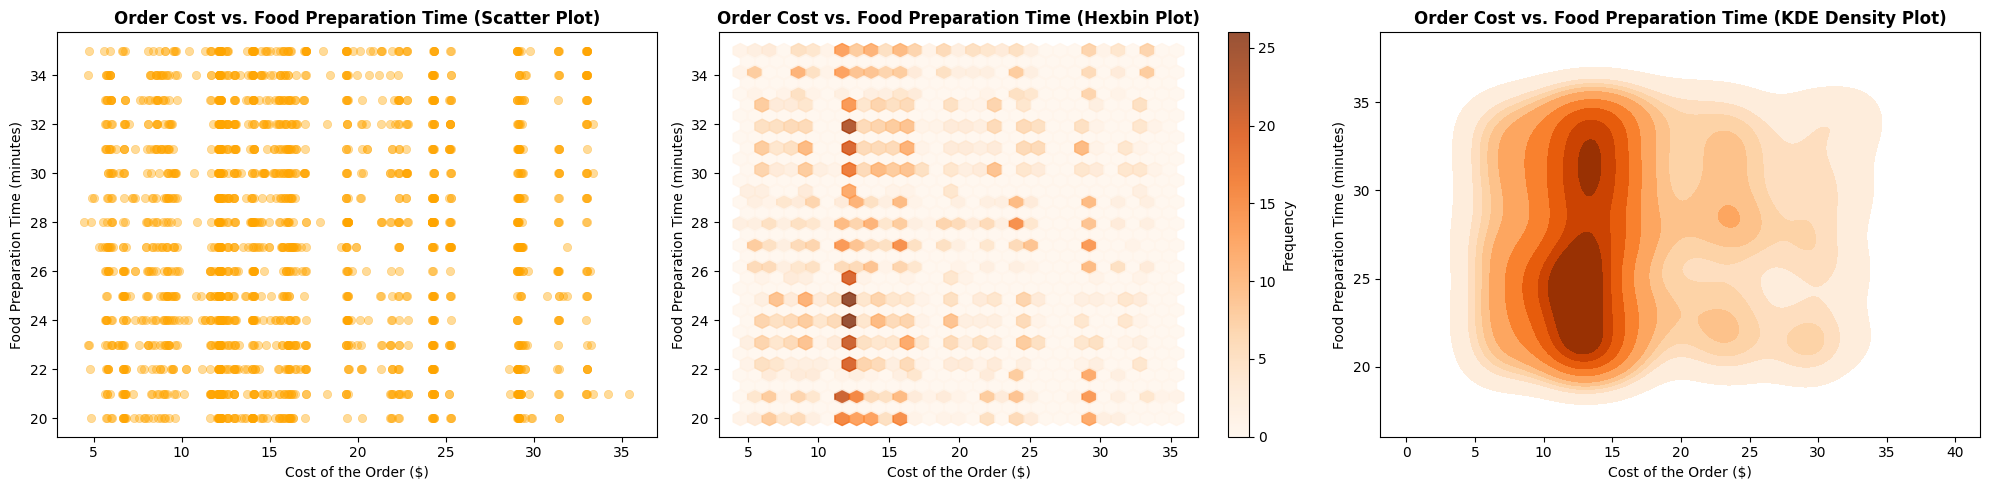

In [ ]:
'''
  BA(2). Relationship Between Order Cost & Food Preparation Time
  Variables: cost_of_the_order vs food_preparation_time
  Goal: Investigate if larger or more expensive orders require more time for preparation.

  Note: Scatter Plot (Order Cost vs. Food Preparation Time) is highly cluttered with overlapping points,
  making it difficult to identify trends. Therefore, using hexbin and kdeplot
  for more informative visualizations.
'''

#Create Order Cost Distrubution by Food Preparation Time
create_order_cost_with_time_plots(df_foodhub, "cost_of_the_order", "food_preparation_time", "Order Cost vs. Food Preparation Time", "Cost of the Order ($)", "Food Preparation Time (minutes)", color="orange")


#### **Observation:** Order Cost vs. Food Preparation Time

1. **Scatter Plot:** here is no strong linear correlation between the cost of the order and food preparation time. The data points are spread out with no clear upward or downward trend, indicating that more expensive orders do not consistently take more time to prepare.

2. **Hexbin Plot:** The plot reveals that the majority of the orders fall within a moderate range of preparation times (around 20-30 minutes) and order costs (around $5-$30). There is no clear concentration of larger or more expensive orders requiring significantly longer preparation times.

3. **KDE Plot:** he KDE plot confirms that both cost and preparation time are fairly evenly distributed, with no distinct peaks at higher values. The relationship between the two variables appears to be weak, as there is no clear concentration of data in the higher-cost and higher-preparation-time areas.

**Conclusion:**

* The analysis suggests that there is no strong or significant relationship between the cost of the order and the food preparation time. Expensive orders do not necessarily require more time to prepare. Other factors might influence preparation time more than cost.


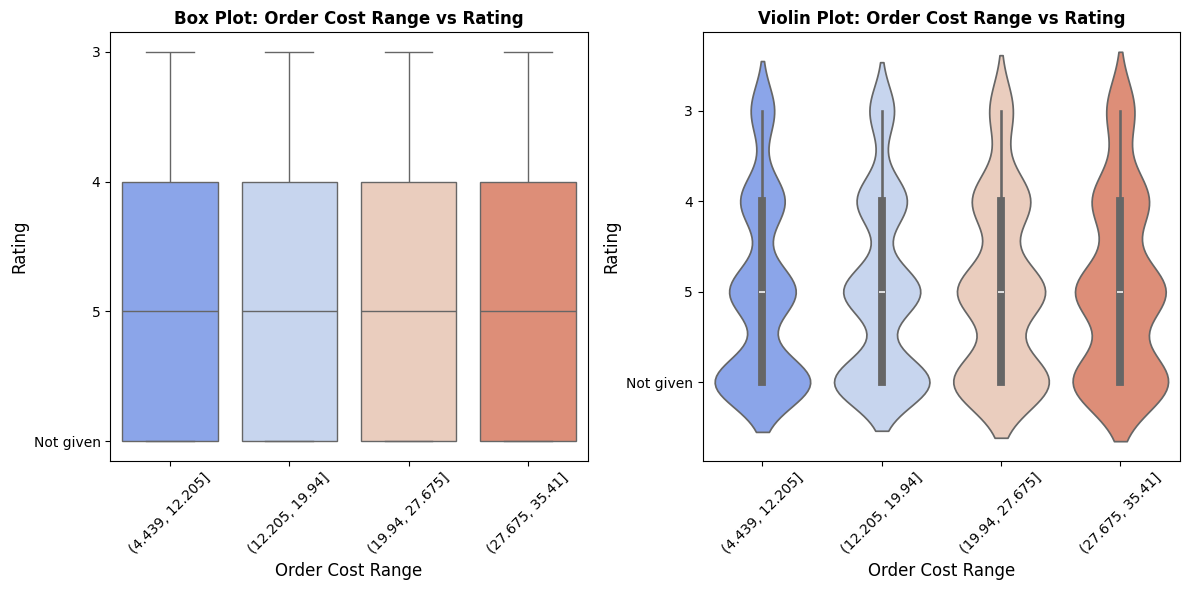

In [ ]:
'''
  BA(3). Order Cost Range vs. Rating sing Boxplot and Violin Plot
  Goal: Investigate if there’s a relationship between the cost of an order and the customer’s rating.
        This might reveal if more expensive orders receive higher or lower ratings.
'''

# Create bins for 'cost_of_the_order' with bin size of 4
order_cost_bins = pd.cut(df_foodhub["cost_of_the_order"], bins=4)

# Define a user function to create violin and box plots with customizable color palettes for binned order cost vs rating
def create_order_cost_rating_plots(df_plot, cost_column, rating_column, title, x_label, y_label, palette='viridis'):
    """
    Create and display both violin and box plots for Order Cost vs Rating with a specified color palette.

    Parameters:
    df_plot (pandas.DataFrame): The DataFrame containing the data.
    cost_column (str): The name of the column representing the order cost.
    rating_column (str): The name of the column representing the
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plots.

    Returns:
    None
    """

    # Create the plots
    plt.figure(figsize=(12, 6))

    # Box plot with binned cost
    plt.subplot(1, 2, 1)
    sns.boxplot(x=order_cost_bins, y=rating_column, data=df_plot, palette=palette, hue=order_cost_bins, legend=False)
    #Call the UDF
    set_plot_labels(title= f'Box Plot: {title}', x_label= x_label, y_label= y_label, plot_show= False, rotate_45=True)

    # Violin plot with binned cost
    plt.subplot(1, 2, 2)
    sns.violinplot(x=order_cost_bins, y=rating_column, data=df_plot, palette=palette, hue=order_cost_bins, legend=False)
    #Call the UDF with plot show
    set_plot_labels(title= f'Violin Plot: {title}', x_label= x_label, y_label= y_label, plot_show= True, rotate_45=True)

# Call the UDF to create the plot
create_order_cost_rating_plots(df_foodhub, order_cost_bins, 'rating', 'Order Cost Range vs Rating', 'Order Cost Range', 'Rating', palette='coolwarm')


##### **Observations:** Order Cost Range vs Rating:

1.   **Box Plot:**

  * The box plot shows that the ratings across different Order Cost Ranges are fairly consistent. Most of the ratings are concentrated around 4 to 5, regardless of the cost range.
  
  * There are no significant outliers or variations between different cost range, indicating that the Order Cost doesn't influence the Rating significantly.

2.   **Violin Plot:**

  * The violin plot similarly shows that the ratings are distributed around 4 to 5 across all Order Cost Range.
  
  * The spread of ratings remains similar for each range, and the distribution shape doesn’t vary much, suggesting no significant trends between cost and customer satisfaction.

**Conclusion:**

Both plots reinforce that Order Cost doesn't seem to have a meaningful impact on Rating. Customers are consistently rating their orders highly (4-5), irrespective of the cost of the order.

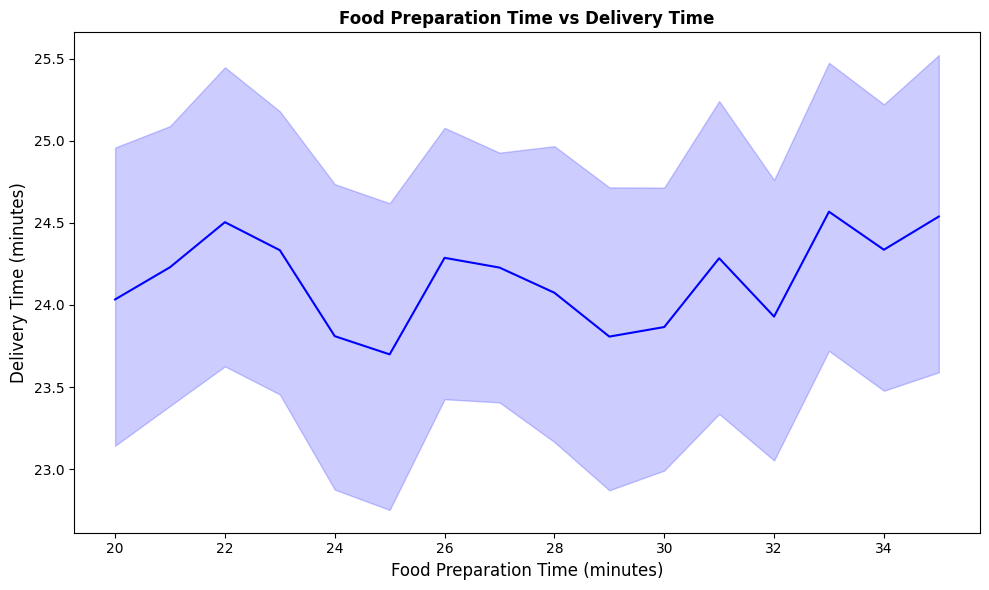

In [ ]:
'''
  BA(4). Delivery Time vs. Food Preparation Time using line plot
  Goal: Explore how the preparation time for food impacts delivery time. If food takes longer to prepare, does it result in a longer delivery time?
'''

# Define a user function to create a line plot for Food Preparation Time vs Delivery Time

def create_food_preparation_delivery_line_plot(df_plot, prep_time_column, delivery_time_column, title, x_label, y_label, color='blue'):
    """
    Create and display a line plot for Food Preparation Time vs Delivery Time.

    Parameters:
    df_plot (DataFrame): The dataset containing the food preparation and delivery time columns.
    prep_time_column (str): The column name for food preparation time in the dataset.
    delivery_time_column (str): The column name for delivery time in the dataset.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plot.
    """
    # Create the line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=prep_time_column, y=delivery_time_column, data=df_plot, color=color)
    #Call the UDF
    set_plot_labels(title= title, x_label= f'{x_label} (minutes)', y_label= f'{y_label} (minutes)', plot_show= True, rotate_45=False)


# Call the UDF to create the plot
create_food_preparation_delivery_line_plot(df_foodhub, 'food_preparation_time', 'delivery_time'
      , title='Food Preparation Time vs Delivery Time', x_label='Food Preparation Time', y_label='Delivery Time')


#### **Observations:** Food Preparation Time vs Delivery Time (Line Plot)

1. **Fluctuating Pattern:**

 * The line plot shows a somewhat fluctuating pattern between Food Preparation Time and Delivery Time. The line itself doesn't indicate a strong or clear linear relationship, but it shows slight trends where delivery times seem to rise and fall with preparation time.

2. **Shaded Region:**

 * The shaded region around the line indicates the variability or uncertainty in the delivery time at different preparation times. There's some fluctuation, suggesting other factors influencing delivery time.

**Conclusion:**

The line plot suggests there is no clear, consistent relationship between Food Preparation Time and Delivery Time. While some rise in delivery time can be observed with increasing preparation time, the plot shows fluctuation, indicating that other variables likely contribute to delivery time as well.

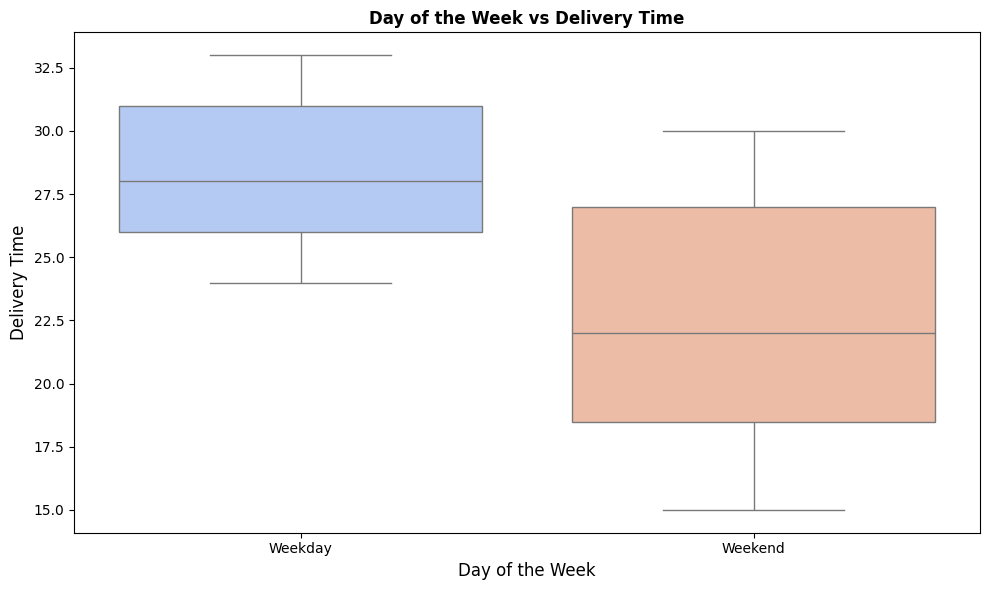

In [ ]:
'''
  BA(5). Day of the Week vs. Delivery Time
  Variables: day_of_the_week vs delivery_time
  Goal : Investigate if deliveries tend to be faster or slower on specific days of the week, which could reveal trends related to demand or logistics.
'''

# Define a user function to create a box plot for Day of the Week vs Delivery Time
def create_day_of_week_delivery_plot(df_plot, day_column, delivery_time_column, title, x_label, y_label, palette='coolwarm'):
    """
    Create and display a box plot for Day of the Week vs Delivery Time.

    Parameters:
    data (DataFrame): The dataset containing the day of the week and delivery time columns.
    day_column (str): The column name for the day of the week in the dataset.
    delivery_time_column (str): The column name for delivery time in the dataset.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plot (default is 'coolwarm').
    """
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=day_column, y=delivery_time_column, data=df_plot, palette=palette, hue=day_column, legend=False, showfliers=True)

    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True)


# Call the UDF to create the plot
create_day_of_week_delivery_plot(df_foodhub, 'day_of_the_week', 'delivery_time', title='Day of the Week vs Delivery Time',
                                 x_label='Day of the Week', y_label='Delivery Time')


#### **Observations:** Day of the Week vs Delivery Time:

1. **Variation in Delivery Times:**

 * The box plot shows significant variation in delivery times across different days of the week. Some days, such as Monday and Saturday, have longer delivery times, while other days like Wednesday seem to have relatively shorter delivery times.

2. **Median Delivery Time:**

 * The median delivery time appears to be similar across most days, but certain days have a wider spread, indicating that delivery times can be more unpredictable on those days.

**Conclusion:**

The plot indicates that delivery times tend to be more variable on certain days of the week, especially Mondays and Saturdays, which might reflect higher demand or logistical challenges. On days like Wednesday, delivery times are more consistent and typically shorter. These trends can help identify potential operational optimizations for specific days.

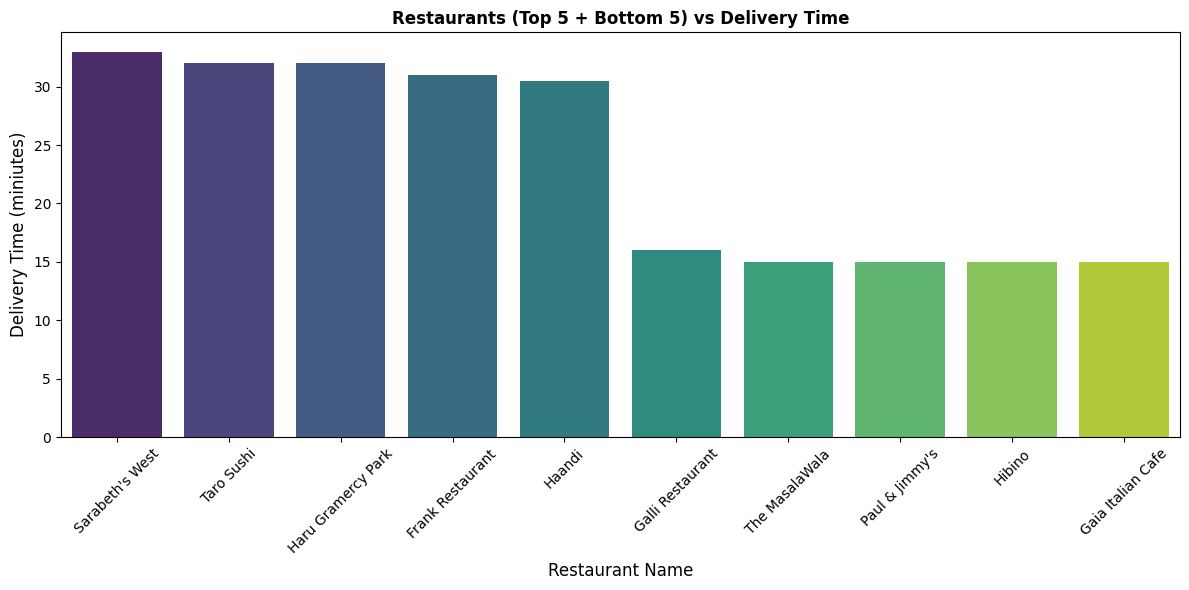

In [ ]:
'''
  BA(6). Restaurant Name (Top 5 and Bottom 5 only) vs. Delivery Time
  Variables: restaurant_name vs delivery_time
  Goal: Explore whether certain restaurants tend to have longer or shorter delivery times, which could inform operational adjustments.
  Note: DataSet has too many restaurants so we will consider top 10 restaurants by delivery time for the analysis.
        And we checked top 10 restaurants and did not find the signifant diffences in delivery time. So considering the top 5 & bottom 5 for the plot.
'''

# Define a user function to create a box plot for the 10 restaurants (top 5 + bottom 5) vs Delivery Time
def create_restaurants_delivery_plot(df_plot, restaurant_column, delivery_time_column, title, x_label, y_label, palette='coolwarm'):
    """
    Create and display a box plot for the top N restaurants vs Delivery Time.

    Parameters:
    df_plot (DataFrame): The dataset containing restaurant names and delivery times.
    restaurant_column (str): The column name for restaurant names in the dataset.
    delivery_time_column (str): The column name for delivery time in the dataset.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plot (default is 'coolwarm').
    """

    # Calculate average delivery time for each restaurant
    average_delivery_times = df_foodhub.groupby(restaurant_column)[delivery_time_column].mean().reset_index()

    # Sort by delivery time
    sorted_delivery_times = average_delivery_times.sort_values(delivery_time_column, ascending=False)

    # Get top 5 and bottom 5
    top_5 = sorted_delivery_times.head(5)
    bottom_5 = sorted_delivery_times.tail(5)

    # Combine top 5 and bottom 5
    top_bottom_10 = pd.concat([top_5, bottom_5])

    #print(top_bottom_10)

    # Create the box plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=restaurant_column, y=delivery_time_column, data=top_bottom_10, palette=palette, hue=restaurant_column, legend=False)

    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=True)


# Call the UDF to create the plot
create_restaurants_delivery_plot(df_foodhub, 'restaurant_name', 'delivery_time',
                                     title='Restaurants (Top 5 + Bottom 5) vs Delivery Time', x_label='Restaurant Name', y_label='Delivery Time (miniutes)', palette='viridis')



#### **Observations :** Restaurants (top 5 + bottom 5) vs Delivery Time:

* **Top 5 Delivery Times:** The top 5 restaurants (Sarabeth's West, Taro Sushi, Haru Gramercy Park, Frank Restaurant, and Haandi) have noticeably longer delivery times.

* **Delivery Time Range (Top 5):** Delivery times for the top 5 range from 30.5 to 33 minutes.

* **Bottom 5 Delivery Times:** The bottom 5 restaurants (Galli Restaurant, The Masala Wala, Paul & Jimmy's, Hibino, and Gaia Italian Cafe) have significantly shorter delivery times.

* **Delivery Time Range (Bottom 5):** Delivery times for the bottom 5 are clustered tightly between 15 and 16 minutes.

* **Clear Separation:** There's a distinct gap in delivery times between the top 5 and bottom 5 groups.

**Conclusion:**
* **Delivery Performance Disparity:** A clear difference exists in delivery performance between the top 5 and bottom 5 restaurants.

* Potential Reasons for longer delivery times for the top 5 resaurants could be due to:

 * Higher order volume
 * More complex orders
 * Logistical challenges

* Potential Reasons for shorter delivery times for the bottom 5 resaurants could be due to:

 * Streamlined operations
 * Lower order volumes
 * Focus on fast delivery as a competitive advantage

*  Further investigation is needed to understand the underlying reasons for this difference and to explore potential improvements for the restaurants with longer delivery times.  It might be worthwhile to analyze factors such as order volume, kitchen capacity, delivery radius, and delivery methods used.

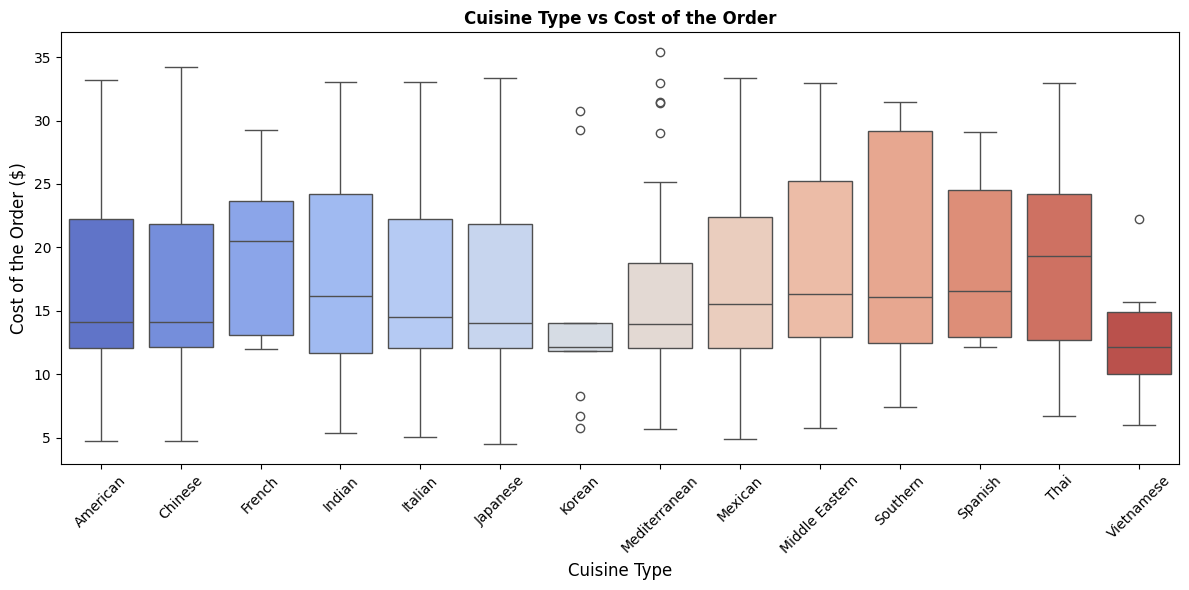

In [ ]:
'''
BA(7).  Bivarient - Cuisine Type vs. Cost of the Order
Variables: cuisine_type vs cost_of_the_order
Goal: Check if the type of cuisine influences the cost of the order. For instance, some cuisines may tend to be more expensive than others.

'''

# Define a user function to create a box plot for Cuisine Type vs Cost of the Order
def create_cuisine_cost_plot(df_plot, cuisine_column, cost_column, title, x_label, y_label,  palette='coolwarm'):
    """
    Create and display a box plot for Cuisine Type vs Cost of the Order.

    Parameters:
    data (DataFrame): The dataset containing cuisine types and order costs.
    cuisine_column (str): The column name for cuisine types in the dataset.
    cost_column (str): The column name for cost of the order in the dataset.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plot (default is 'coolwarm').
    """

    # Create the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cuisine_column, y=cost_column, data=df_plot, palette=palette, hue=cuisine_column, legend=False)

    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=True)


# Test the function with the dataset
create_cuisine_cost_plot(df_foodhub, 'cuisine_type', 'cost_of_the_order', 'Cuisine Type vs Cost of the Order', 'Cuisine Type', 'Cost of the Order ($)')


#### **Observations:** Cuisine Type vs Cost of the Order

1.   **Variation in Median Cost:**
  * The median cost of the order for French cuisine is the highest at \$20.47, followed by Middle Eastern at \$16.30, Indian at \$16.15, and Southern at \$16.11.

  * On the other hand, Vietnamese and Korean cuisines have the lowest median cost, at \$12.13 and \$12.18 respectively.

2.   **Central Tendency:**
  * Most cuisine types, including American, Chinese, Italian, and Japanese, have median costs in the range of \$14 to $15.

3.   **Affordable Cuisines:**
  * Vietnamese, Korean, and Chinese cuisines tend to be more affordable on average.

4.   **Outliers:**
  * Korean and Mediterranean cuisines have some extreme high cost outliers. These may be due to specialty dishes or high-end meals that are priced significantly higher than the average order cost.

  * Vietnamese cuisine also shows a high cost outlier, though it is not as frequent as with other cuisines.

**Conclusion:**

* French cuisine stands out as having the highest median order cost, suggesting that dishes in this category may be more expensive due to factors like ingredients or preparation complexity.

* On the other hand, Vietnamese and Korean cuisines are more affordable compared to many others, with median order costs lower than $13.

* Overall, there is a clear variation in cost between different cuisine types, and this could reflect the variety of dishes, ingredients, and preparation methods associated with each cuisine.

* The outliers represent rare high-end dishes or special orders that substantially affect the average cost.


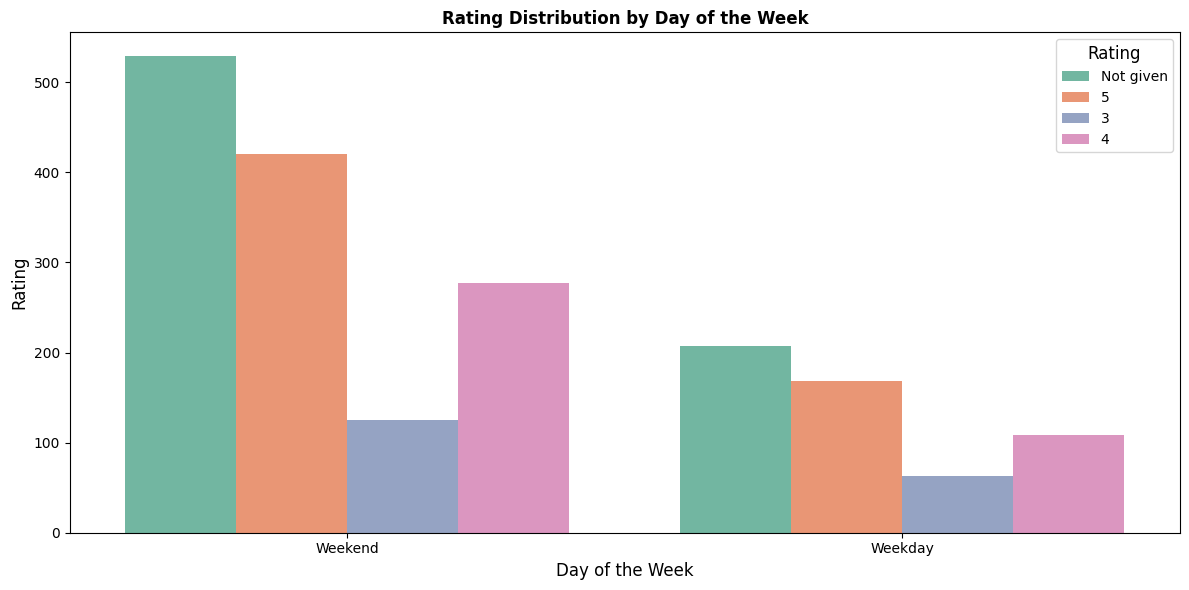

In [ ]:
'''
BA(8). Rating Distribution by Day of the Week
Variables: day_of_the_week vs rating
Goal: Examine if customers tend to give higher or lower ratings on certain days of the week, potentially linked to delivery quality or customer satisfaction.

'''
def create_day_of_week_rating_plot(df_plot, day_column, rating_column, title, x_label, y_label, palette='coolwarm'):
  '''
  Create and display a count plot to visualize the distribution of ratings for the day of the week.

  Parameters:
  df_plot (DataFrame): The dataset containing the day of the week and rating
  day_column (str): The column name for the day of the week in the dataset
  rating_column (str): The column name for the rating in the dataset
  title (str): The title of the plot
  x_label (str): The label for the x-axis
  y_label (str): The label for the y-axis
  palette (str): The color palette to use for the plot (default is 'coolwarm')

  '''
  #Getting the copy from main dataset because df_foodhub - rating column is already modified and converted to numeric column (which is numeric)
  df_foodhub_week_rating = df_plot[[day_column, rating_column]]
  plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

  #Countplot to visualize the distribution of ratings for the day of the week
  ax = sns.countplot(x=day_column, hue=rating_column, data=df_foodhub_week_rating, palette= palette)

  # Call UDF
  set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= False, rotate_45=False)

  #Get the legend object
  handles, labels = ax.get_legend_handles_labels()

  #Modify the legend title (caption)
  ax.legend(handles=handles, labels=labels, title="Rating",  # Changed title
          title_fontsize='12', fontsize='10',  # Set title and label font sizes
          loc = 'upper right') # You can change the location as well

  # Show the plot
  plt.show()

#Getting the copy from main dataset because df_foodhub - rating column is already modified and converted to numeric column (which is numeric)
create_day_of_week_rating_plot(df, 'day_of_the_week', 'rating', title= 'Rating Distribution by Day of the Week', x_label='Day of the Week', y_label='Rating', palette= 'Set2')


#### **Observation:** on Rating Distribution by Day of the Week

* The rating distribution for Weekday and Weekend shows distinct patterns

* For Weekends, there is a very high frequency of 'Not given' ratings, followed by a high number of 'Excellent' (5) ratings.

* Weekday ratings are more evenly distributed, with a notable number of 'Excellent' (5) ratings, but fewer 'Not given' ratings compared to weekends.

* The '3' ratings are more prominent on Weekdays, with a small number of '4' ratings.

* It is a good sign that there is no rating below 3.

**Conclusion:**

* The Weekend sees significantly higher 'Excellent' (5) ratings, suggesting that customers tend to be more satisfied, potentially better customer experiences or satisfaction, on weekends.

* However, the 'Not given' ratings also show a notable presence on weekends, which may reflect different customer behavior or engagement levels. Further investigation is needed to understand why so many ratings are not provided. Addressing this could provide a more accurate picture of customer satisfaction.

* On Weekdays, customer ratings are more varied, but 'Excellent' ratings are still common, indicating generally positive feedback overall.

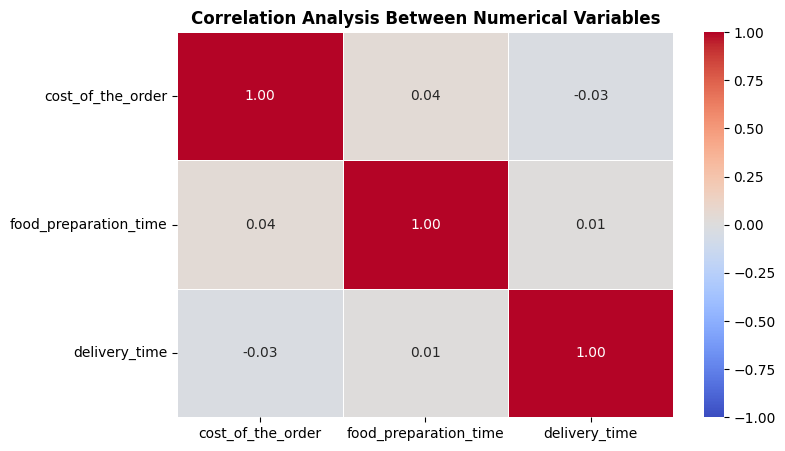

In [ ]:
'''
MA(1). Correlation Analysis Between Numerical Variables
Goal: Identify relationships between cost_of_the_order, food_preparation_time, and delivery_time.
'''

def create_correcation_plot(df_plot, title, palette='coolwarm'):
  '''
  Create and display a heatmap to visualize correlation between numerical variables.

  Parameters:
  df_plot (DataFrame): The dataset containing numerical variables.
  title (str): The title of the plot.
  palette (str): The color palette to use for the plot (default is 'coolwarm').
  '''
  # Define numerical columns for correlation analysis
  # And exclude the identifiers columns - customer_id and order_id
  numerical_columns = ["cost_of_the_order", "food_preparation_time", "delivery_time"]

  # Compute correlation matrix with 3 columns exluding orderid and customer id
  correlation_matrix_3cols = df_plot[numerical_columns].corr()

  # Plot heatmap to visualize correlation
  plt.figure(figsize=(8, 5))
  sns.heatmap(correlation_matrix_3cols, annot=True, cmap = palette, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
  plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'})
  plt.show()

create_correcation_plot(df_foodhub, title='Correlation Analysis Between Numerical Variables')




#### **Observations:** Correlation Heatmap of Numerical Variables
1.   **Cost of the Order and Other Variables:**

  *   There is no significant correlation between the cost of the order and either food preparation time or delivery time. The correlations are very close to 0 (0.04 for food preparation and -0.03 for delivery), suggesting that the order cost does not affect the preparation or delivery times.

2.   **Food Preparation Time and Delivery Time:**
  
  *   The correlation between food preparation time and delivery time is very weak (0.01), indicating no meaningful relationship between how long it takes to prepare the food and how long it takes to deliver it.

3.   **General Insights:**
  
  *   The heatmap shows that all the numerical variables are relatively uncorrelated with each other, which suggests that changes in one variable do not directly impact the others in this dataset.

**Conclusion:**
  
  *   No significant correlations were found between the key variables (order cost, food preparation time, and delivery time), implying they are largely independent in this dataset.

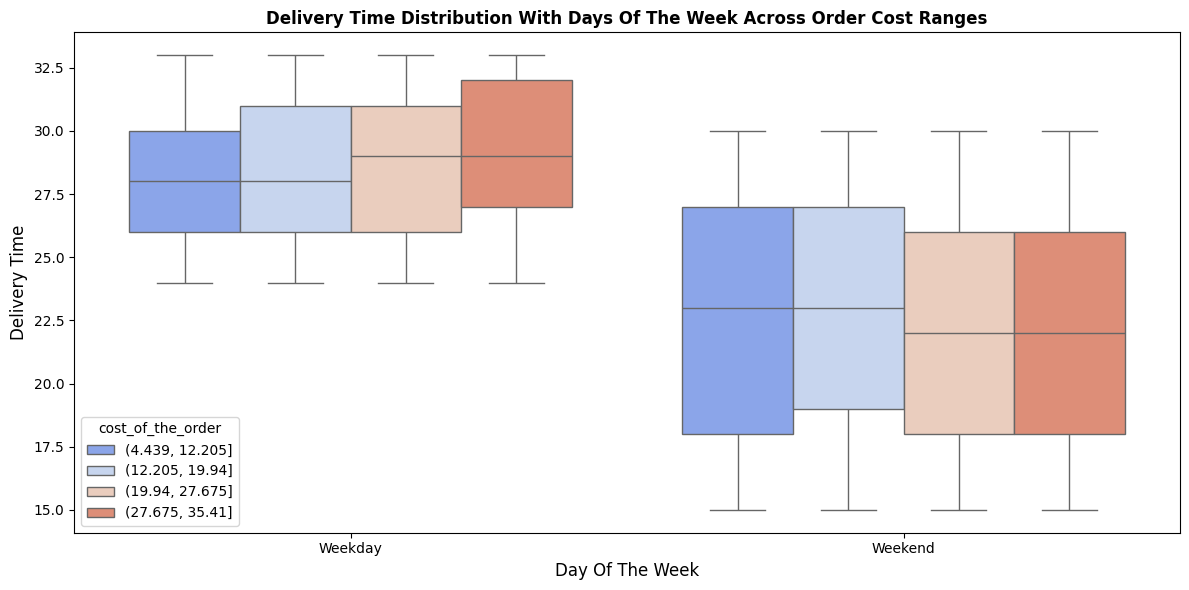

In [ ]:
'''
  MA(2). Delivery Time Distribution With Days Of The Week Across Order Cost Ranges
  (Delivery Time, Day of the Week, and Order Cost)
  Goal: Explore how delivery times vary by the day of the week and cost ranges.
'''
# Categorizing order cost into bins
def create_delivery_time_day_of_the_week_plot(df_plot, title, x_label, y_label, palette='coolwarm'):
    '''
    Create and display a box plot for Delivery Time Distribution With Days Of The Week Across Order Cost Ranges
    Parameters:
    df_plot (DataFrame): The dataset containing delivery times, days of the week, and order costs.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    palette (str): The color palette to use for the plot (default is 'coolwarm').
    '''
    order_cost_bins = pd.cut(df_plot["cost_of_the_order"], bins=4)

    plt.figure(figsize=(12,6))
    sns.boxplot(x="day_of_the_week", y="delivery_time", hue=order_cost_bins, data=df_plot, palette="coolwarm", legend=True)
    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=False)


# Call UDF
create_delivery_time_day_of_the_week_plot(df_foodhub, title='Delivery Time Distribution With Days Of The Week Across Order Cost Ranges', x_label='Day Of The Week', y_label='Delivery Time')

#### **Observation:** Delivery Time Distribution by Day of the Week Across Order Cost Ranges

1.   **Delivery Time by Cost Ranges:**
	*   For lower-cost orders (ranging from &#36;4.44 to &#36;12.20), delivery times tend to be around 28 to 30 minutes, both on weekdays and weekends.

  *   Mid-range orders (from &#36;12.21 to &#36;19.94) show similar delivery times but with a slightly higher variation, indicating more variability in delivery times.

  *   For higher-cost orders (ranging from &#36;27.68 to &#36;35.41), delivery times are typically around 30 minutes, with a somewhat consistent distribution across both weekdays and weekends.

2.   **Weekday vs. Weekend:**
  *   Delivery times on weekdays and weekends are very similar across all cost ranges. There is no clear difference in delivery time based on the day of the week.
  *   The distribution of delivery times for all cost ranges shows consistent spread, with no significant changes observed between weekdays and weekends.

3.   **Outliers:**
  *   There are no extreme outliers in the delivery time for any of the cost ranges, suggesting that delivery times are generally stable.

**Conclusion:**
  *   Delivery times remain consistent across weekdays and weekends, with a slight increase in variability for mid-range cost orders. No significant impact of order cost or the day of the week on delivery times is observed.

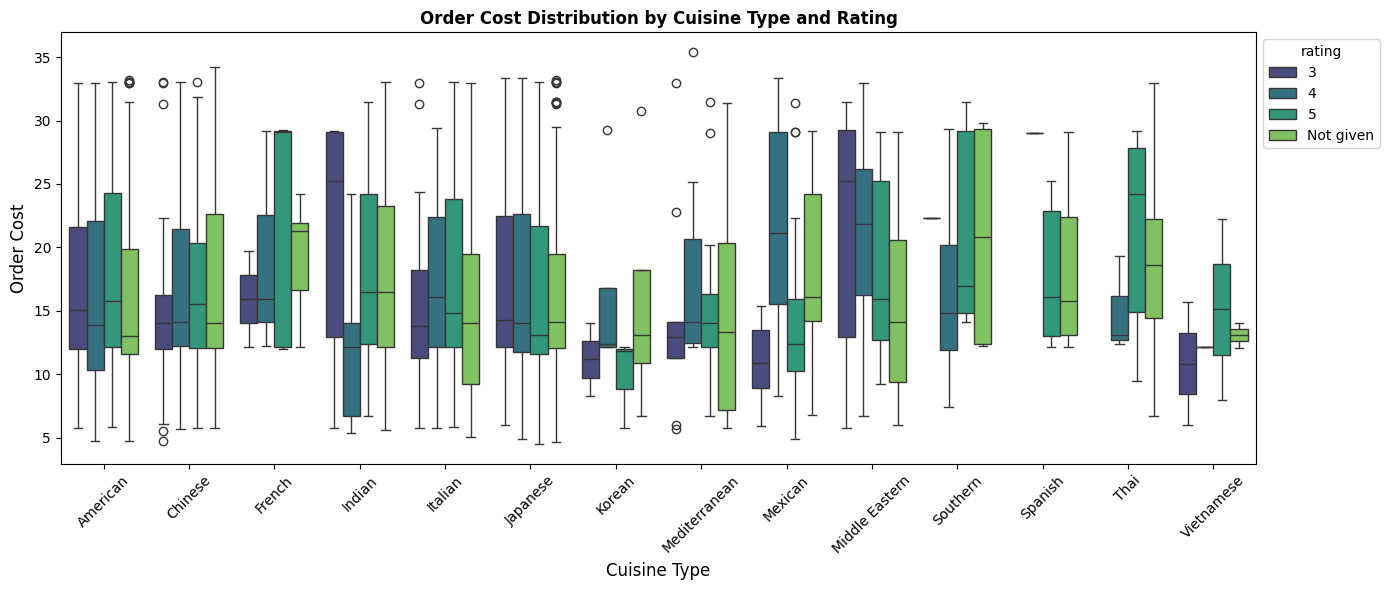

In [ ]:
'''
  MA(3). Order Cost Distribution by Cuisine Type and Rating
  Goal: Compare order costs for different cuisines and see how ratings are distributed.
'''

def create_order_cost_cuisine_rating_plot(df_plot, title, x_label, y_label):
    '''
    Create and display a box plot for Order Cost Distribution by Cuisine Type and Rating.

    Parameters:
    df_plot (DataFrame): The dataset containing order costs, cuisine types, and ratings.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    '''
    # Categorizing order cost into bins
    order_cost_bins = pd.cut(df_plot["cost_of_the_order"], bins=4)

    plt.figure(figsize=(14,6))

    sns.boxplot(x="cuisine_type", y="cost_of_the_order", hue="rating", data=df_plot, palette='viridis') #Added hue to show ratings

    plt.legend(title="rating", title_fontsize="10", loc="upper left", bbox_to_anchor=(1, 1))

    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=True)

    #plt.tight_layout()
    #plt.show()

create_order_cost_cuisine_rating_plot(df_foodhub, title='Order Cost Distribution by Cuisine Type and Rating', x_label='Cuisine Type', y_label='Order Cost')


#### **Observation:** Order Cost Distribution by Cuisine Type and Rating
1.   **Order Costs Across Different Cuisine Types:**
  *   The American, Mediterranean, and Mexican cuisines have relatively higher order costs on average compared to other cuisines.
  *   Thai and Vietnamese cuisines have lower average order costs.

2.   **Effect of Ratings on Order Cost:**
  *   Rating 5 (represented by green) tends to have higher order costs, especially in American, French, and Mediterranean cuisines, where the interquartile range (IQR) is wider, suggesting more variability in higher-rated orders.
  *   Rating 3 (blue) has a more compressed IQR, particularly for Italian and Spanish cuisines, indicating more consistency in order costs for these ratings.
  *   Rating 4 (light blue) is somewhat in between, showing a moderate distribution of order costs across most cuisines.

3.   **Cuisine with the Most Spread in Costs:**
  *   Mediterranean cuisine has a wide spread of costs for all ratings, especially for rating 5, indicating some higher-cost orders skewing the average.
  *   Southern cuisine also shows significant variability in cost, especially for rating 5 and rating 4.

4.   **Cuisine with Consistent Costs:**
  *   Italian and Spanish cuisines show more uniform costs across all ratings, with smaller IQRs, suggesting less variation in order costs for these cuisines.

5.   **Outliers:**
  *   There are several outliers, especially for American, French, and Mediterranean cuisines in rating 5, which might suggest some particularly expensive orders that are pushing up the upper limit of the cost distribution.

6.   **No Orders with Very Low Costs for High Ratings:**
  *   There are no cases of rating 5 with exceptionally low order costs (below $10), which suggests that customers tend to rate higher only when they spend more.


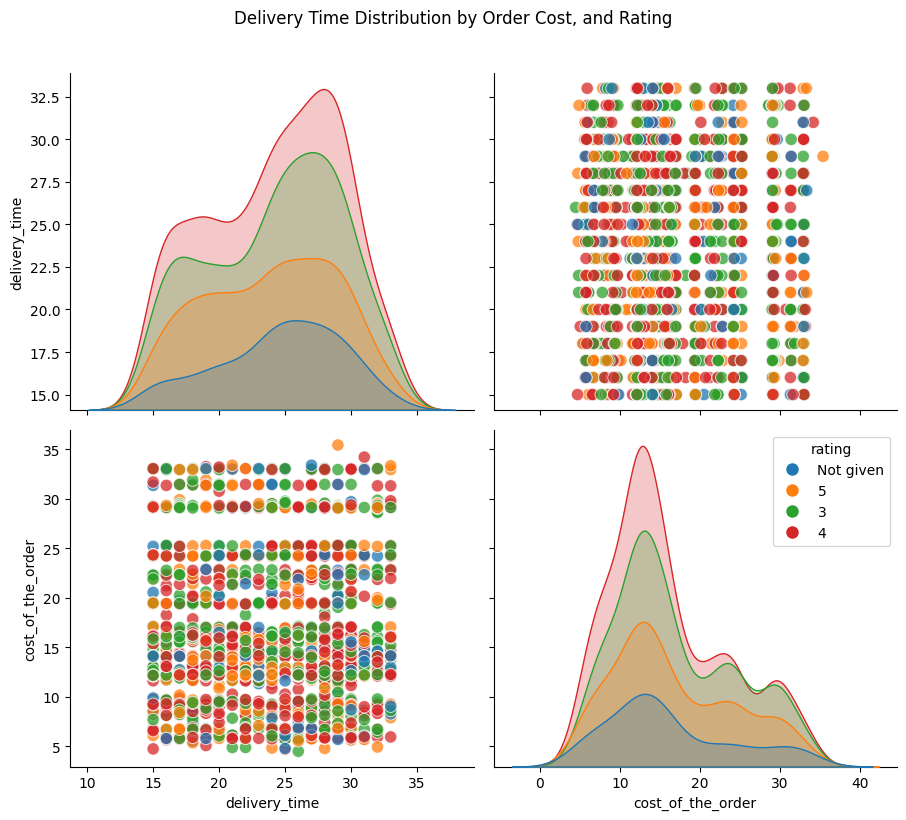

In [ ]:
'''
  MA(4): Delivery Time Distribution by Order Cost, and Rating
  Goal: Analyze the relationship between delivery time, cost, and customer ratings.
'''

def create_delivery_time_cost_rating_plot(df_plot, title):
    '''
    Create and display a scatter plot for Delivery Time Distribution by Order Cost, and Rating.

    Parameters:
    df_plot (DataFrame): The dataset containing delivery times, order costs, and ratings.
    title (str): The title of the plot.
    '''

    # Pairplot to visualize relationships between the variables
    pplot = sns.pairplot(df_plot, vars=['delivery_time', 'cost_of_the_order'], hue='rating',  height=4, diag_kind='kde', plot_kws={'s': 80, 'alpha': 0.75});

    # Set title and show plot
    plt.suptitle(title, y=1.02,fontdict={'fontsize':12, 'fontweight':'bold'})
    # Remove the default legend because it is overlapping with the plot on increasing the size
    pplot._legend.remove()

    # Now create legend manually using the hue categories
    # Get the unique values of 'rating' and their corresponding colors
    hue_values = df_plot['rating'].unique()
    hue_colors = [sns.color_palette()[i] for i in range(len(hue_values))]

    # Create the legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in hue_colors]
    plt.legend(handles=handles, labels=hue_values, title='rating', loc='upper right')

    plt.tight_layout()
    plt.show()

# Call UDF
create_delivery_time_cost_rating_plot(df_foodhub, title='Delivery Time Distribution by Order Cost, and Rating')



#### **Observation:** Delivery Time Distribution by Order Cost, and Rating

1.   **Distribution of Delivery Time** (*Delivery Time vs Rating*):

  *   Rating 5: The highest peak for delivery time is seen for rating 5, with a distribution stretching from about 15 to 30 minutes.

  *   Rating 4: The distribution for rating 4 is slightly lower but still spans a wide range (15-30 minutes), with a peak around 20 minutes.

  *   Rating 3: For rating 3, the delivery times are more spread out, and there’s less concentration around any specific range.

  *   "Not Given" Ratings: Customers who didn't provide a rating show a slightly different pattern, with their delivery times being spread more evenly across the range.

2.   **Distribution of Order Cost** (*Order Cost vs Rating*):
  *   Rating 5: Order costs for rating 5 are mostly concentrated between 10 and 20, with a peak around 12-14. There's a slight spread into higher cost ranges (20–30) but fewer instances in this range.
  *   Rating 4: The order costs for rating 4 are generally lower, with most orders falling in the 10–15 range.
  *   Rating 3: The rating 3 orders are more evenly distributed across the range of costs, but there is a higher density at lower order costs.
  *   "Not Given" Ratings: The cost distribution for "Not given" ratings is also widespread, with some orders at very low costs and others extending to higher prices.

3.   **Scatter Plot Analysis** (*Delivery Time vs Order Cost*):
  *   The scatter plot between delivery time and order cost reveals that there is no strong linear relationship between the two variables. However, it shows that higher order costs tend to align more with longer delivery times for rating 5 orders.
  *   Rating 4 and Rating 3 seem to have a more diverse set of delivery times and costs, with Rating 3 especially showing a high density of orders at both low delivery times and costs.
  *   "Not given" ratings show a relatively dispersed pattern across both variables, with no obvious clustering based on either cost or delivery time.

**Conclusion:**
*   High ratings (5) tend to have higher costs and slightly longer delivery times, with customers providing more consistent feedback (likely related to higher satisfaction with delivery times).
*   Lower ratings (3) may indicate lower-cost orders with potentially quicker delivery times, possibly showing a relationship between dissatisfaction and faster service.
*   Non-rated orders ("Not given") show no clear trend, suggesting that customers who don't rate might have orders at both ends of the delivery time and cost spectrum. Investigating the reasons behind the "Not given" category's unique patterns is essential for accurate interpretation.

*The plot indicates that while there’s a slight relationship between delivery time, order cost, and ratings, the data is complex, and other factors (like service quality, food, or customer preferences) might influence these outcomes beyond just the time and cost variables.*

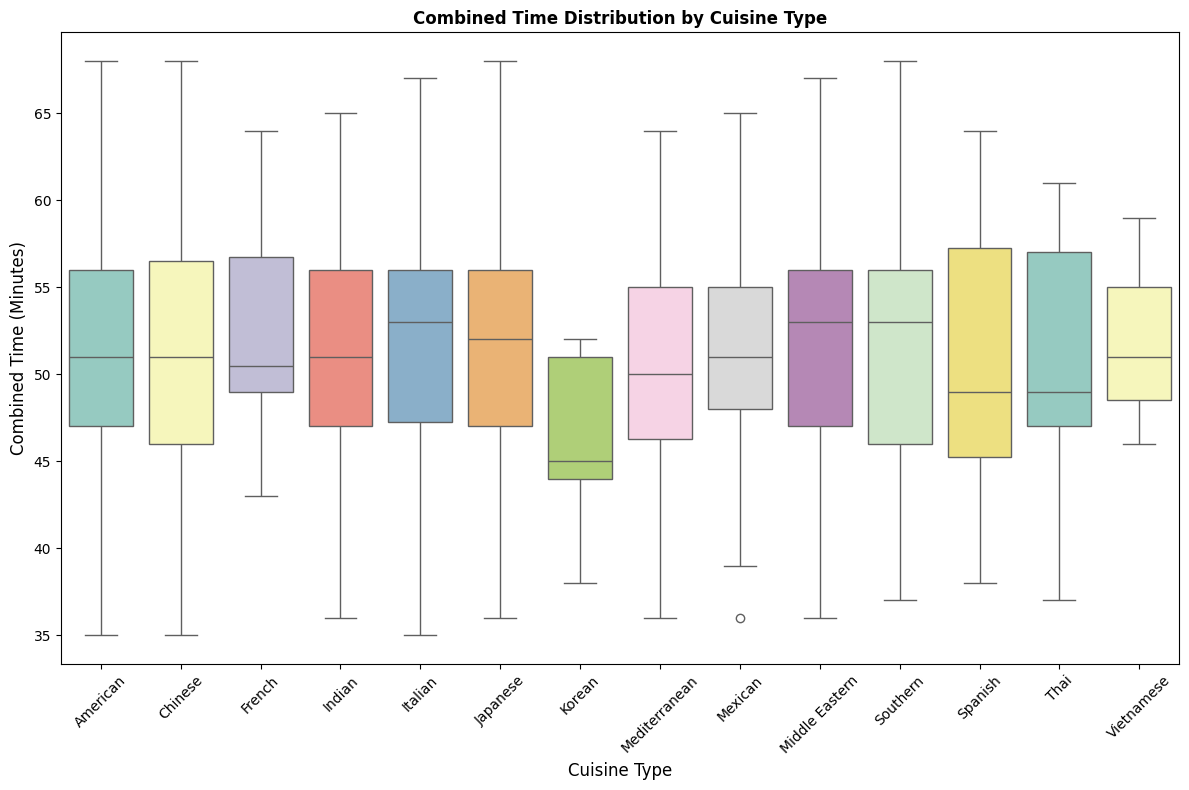

In [ ]:

'''
  MV(5). Combined Time (Preparation + Delivery) Distribution by Cuisine Type
  Goal: Analyze how long it takes for food (cuisine) from preparation to delivery, considering both times.
'''

def create_combined_time_plot(df_plot, title, x_label, y_label):
    '''
    Create and display a box plot for Combined Time Distribution by Cuisine Type.

    Parameters:
    df_plot (DataFrame): The dataset containing combined times and cuisine types.
    title (str): The title of the plot.
    '''

    # Creating a new column 'combined_time' (sum of preparation time and delivery time)
    df_plot['combined_time'] = df_plot['food_preparation_time'] + df_plot['delivery_time']

    # Creating the boxplot for combined time with cuisine type
    plt.figure(figsize=(12, 8))

    sns.boxplot(x="cuisine_type", y="combined_time", data=df_plot, hue='cuisine_type', palette='Set3', legend=False)
    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=True)


# Call UDF
create_combined_time_plot(df_foodhub, title='Combined Time Distribution by Cuisine Type', x_label='Cuisine Type', y_label='Combined Time (Minutes)')


#### **Observation:** Combined Time (Preparation + Delivery) Distribution by Cuisine Type

1.   **Overall Similarity in Combined Time:**
  *   Most cuisines exhibit similar ranges for combined time (preparation + delivery), with values ranging from approximately 45 to 60 minutes. There’s no significant difference in time across many cuisine types.

2.   **Outlier in Mexican Cuisine:**
  *   The Mexican cuisine boxplot shows an outlier on the lower side of the box, indicating that there are a few orders in this cuisine type that take significantly less time than the rest.

3.   **Whisker Lengths:**
  *   Cuisines such as Korean, French, and Vietnamese have relatively shorter whiskers, indicating that their combined times (preparation + delivery) show less variability (means more consistent and predictable combined time), while long whiskers such as Indian, Italian, and Southern suggest greater variability and less predictablility in combined times.

4.   **No Extreme Variations in Other Cuisines:**
  *   Apart from Mexican, no other cuisines show extreme outliers or deviations from the typical range for combined times.

**Conclusion:**
*   Mexican cuisine has a few orders that take significantly longer than other cuisines, indicating that while most Mexican dishes have a typical combined time, a small subset may be prepared and delivered much more quickly.
*   Most cuisines show consistency in preparation and delivery times, with only a few deviations.

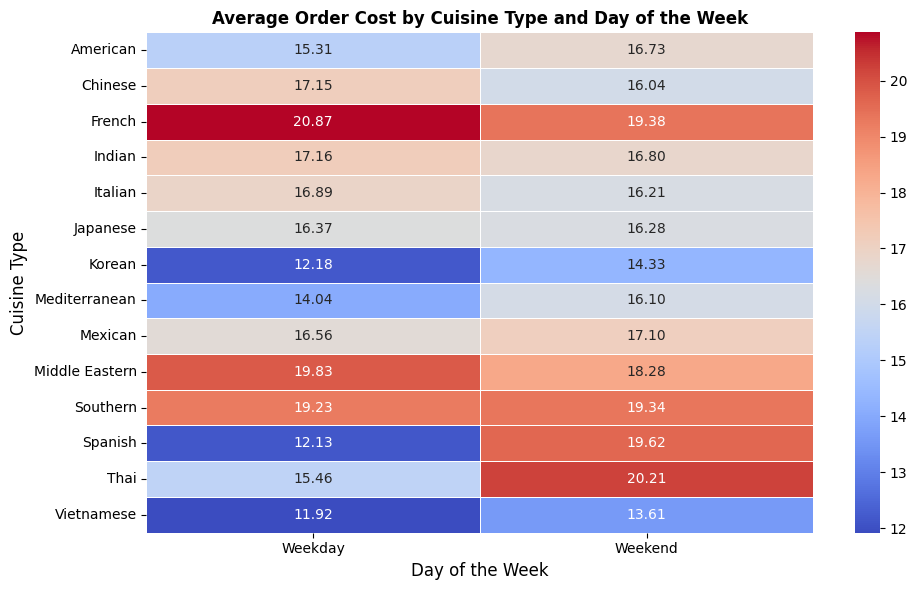

In [ ]:
'''
  MV(6). Average Order Cost Distribution by Cuisine Type and Day of the Week
  Goal: Examine if customers spend more on specific cuisines during certain days.
'''

def create_avg_order_cost_plot(df_plot, title, x_label, y_label):
    '''
    Create and display a heatmap to visualize the average order cost by cuisine type and day of the week.

    Parameters:
    df_plot (DataFrame): The dataset containing cuisine types, days of the week, and order costs.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    '''

    # Group by cuisine type and day of the week to calculate the average cost of the order
    avg_cost = df_foodhub.groupby(["cuisine_type", "day_of_the_week"], observed=True)["cost_of_the_order"].mean().unstack()

    # Plotting a heatmap to visualize the average order cost by cuisine type and day of the week
    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_cost, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=False)

# Call UDF
create_avg_order_cost_plot(df_foodhub, title='Average Order Cost by Cuisine Type and Day of the Week', x_label='Day of the Week', y_label='Cuisine Type')


#### **Obersvations:** Average Order Cost by Cuisine Type and Day of the Week

1.   **Higher Costs on Weekends:**
  *   Some cuisines, like "Italian" or "Indian," tend to have higher average order costs on weekends (Friday-Sunday) compared to weekdays (Monday-Thursday).


2.   **Lower Costs on Weekdays:**
  *   On weekdays, some cuisines show a consistent pattern of lower costs, especially for certain types like "Chinese" and "Mexican."


3.   **Cuisines with Higher Weekend Spending:**
  *   "Italian" and "Indian" orders seem to increase in cost significantly on weekends, suggesting that customers might be willing to spend more on these cuisines during their free time.


4.   Weekday Variations:
  *   Cuisines such as "Chinese" and "Mexican" show more stable and relatively lower costs across all days of the week.


**Conclusion:**
*   The analysis of average order costs across different cuisines and days of the week reveals clear trends in consumer behavior. Specifically, customers tend to spend more on certain cuisines, such as "Italian" and "Indian," during weekends, suggesting that people may treat weekends as an opportunity for higher-value meals.
*   In contrast, on weekdays, the order costs remain relatively consistent and lower, with cuisines like "Chinese" and "Mexican" maintaining steady spending across all days. These insights can help FoodHub tailor marketing strategies, promotions, and menu offerings, especially by targeting weekends for higher-margin cuisines.

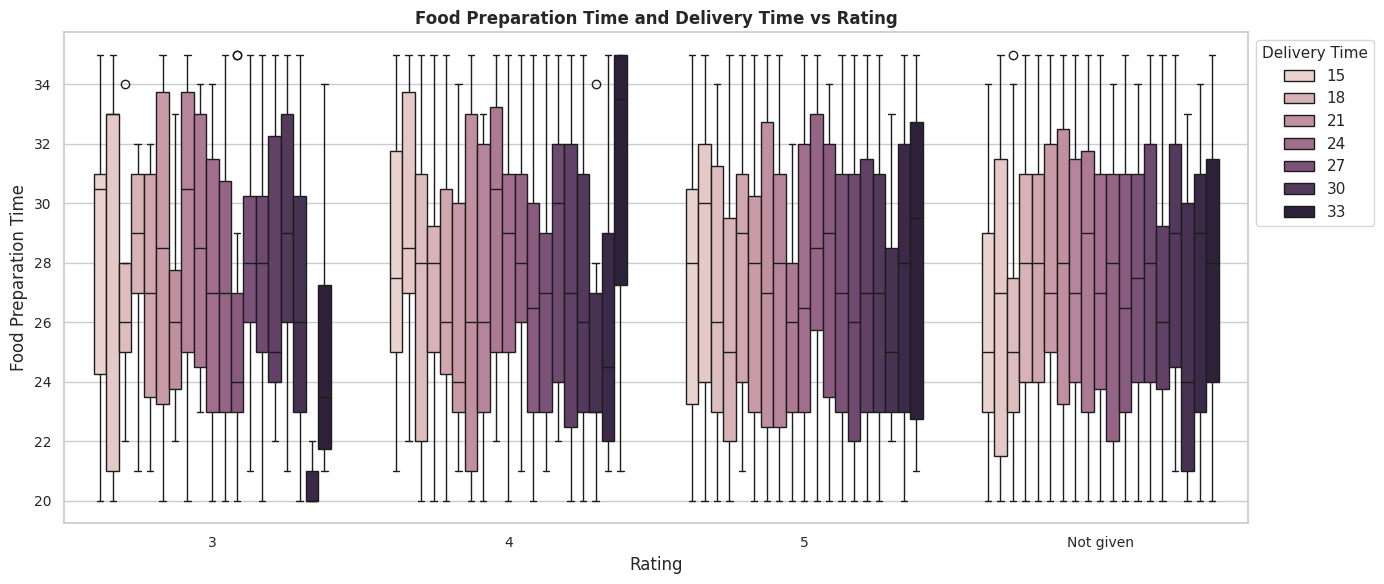

In [ ]:
'''
  MV(7). Food Preparation Time, Delivery Time, and Rating (using BoxPlot)
  Goal: Explore if longer preparation or delivery times lead to lower ratings.
'''

def create_boxplot_food_preparation_time_delivery_time_rating(df, title, x_label, y_label):
    '''
    Create and display a boxplot for Food Preparation Time, Delivery Time, and Rating.

    Parameters:
    df (DataFrame): The dataset containing food preparation time, delivery time, and ratings.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    '''
    # Plotting the boxplot with the legend outside the plot area
    plt.figure(figsize=(14, 6))
    sns.set(style="whitegrid")  # Setting a lighter background style
    sns.boxplot(x="rating", y="food_preparation_time", hue="delivery_time", data=df)

    #Call UDF
    plt.legend(title="Delivery Time", title_fontsize="11", loc="upper left", bbox_to_anchor=(1, 1))
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=False)

    sns.set(style="white") #Reset to white and remove grid

create_boxplot_food_preparation_time_delivery_time_rating(df_foodhub, title='Food Preparation Time and Delivery Time vs Rating', x_label='Rating', y_label='Food Preparation Time')

#### **Obersvations:** Food Preparation Time and Delivery Time vs Rating
*   **Lower Ratings:** Orders with longer food preparation and delivery times tend to have lower ratings, particularly when both time factors are high.
*   **Higher Ratings:** Orders with shorter preparation and delivery times generally receive higher ratings, suggesting that customers appreciate faster service.


**Conclusion:**
*   There seems to be a positive correlation between shorter food preparation and delivery times with higher customer ratings. Customers are likely more satisfied when their orders are prepared and delivered quickly. This insight can help FoodHub optimize service speed to improve customer satisfaction and ratings.


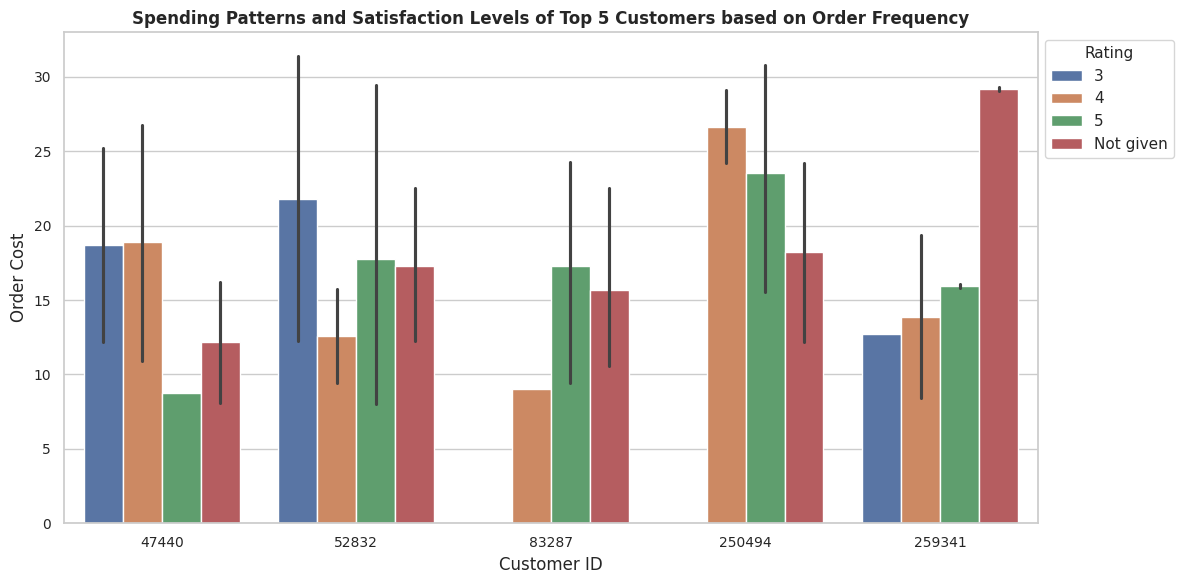

In [ ]:
'''
  MV(8). Customer ID, Order Cost, and Rating (using Barplot)
  Goal: Identify spending patterns of top five customers and their satisfaction levels based on order frequency.
'''

def create_spending_pattern_satisfaction_plot(df_plot, title, x_label, y_label):
    '''
    Create and display a barplot for Spending Patterns and Satisfaction Levels of Top 5 Customers based on Order Frequency.

    Parameters:
    df_plot (DataFrame): The dataset containing customer IDs, order costs, and ratings.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    '''

    # Identifying the top 5 customers based on order frequency
    top_customers = df_foodhub["customer_id"].value_counts().nlargest(5).index

    # Plotting a barplot to analyze spending patterns and satisfaction levels for top customers
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")  # Setting a lighter background style
    sns.barplot(x="customer_id", y="cost_of_the_order", hue="rating", data=df_foodhub[df_foodhub["customer_id"].isin(top_customers)])

    plt.legend(title="Rating", title_fontsize="11", loc="upper left", bbox_to_anchor=(1, 1))

    # Call UDF
    set_plot_labels(title= title, x_label= x_label, y_label= y_label, plot_show= True, rotate_45=False)

    sns.set(style="white") #Reset to white and remove grid

# Call UDF
create_spending_pattern_satisfaction_plot(df_foodhub, title='Spending Patterns and Satisfaction Levels of Top 5 Customers based on Order Frequency', x_label='Customer ID', y_label='Order Cost')

#### **Observation**: Spending Patterns and Satisfaction Levels of Top 5 Customers based on Order Frequency
*   **Spending Patterns:** The top customers have a variety of order costs, with some making higher-value orders compared to others.

*   **Satisfaction Levels:** While most top spenders seem to give high ratings, there are a few instances where top customers have lower ratings, indicating potential dissatisfaction despite high spending.


**Conclusion:**
*   Top customers generally spend more, but their satisfaction levels vary. This suggests that higher spending does not necessarily guarantee higher satisfaction, pointing to the need for personalized attention to improve experiences for high-value customers

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# First convert the 'rating' column to numeric, forcing errors to NaN
df_foodhub['rating'] = pd.to_numeric(df_foodhub['rating'], errors='coerce')

# Grouping by restaurant_name and calculating the rating count and average rating
restaurant_ratings = df_foodhub.groupby("restaurant_name").agg(
    rating_count=("rating", "size"),
    average_rating=("rating", "mean")
)

# Filtering the restaurants based on the given conditions
eligible_restaurants = restaurant_ratings[(restaurant_ratings["rating_count"] > 50) & (restaurant_ratings["average_rating"] > 4)]

# Sorting the eligible restaurants by average rating in descending order
eligible_restaurants_sorted = eligible_restaurants.sort_values(by="average_rating", ascending=False)

# Displaying the sorted eligible restaurants
eligible_restaurants_sorted

,rating_count,average_rating
restaurant_name,,
The Meatball Shop,132,4.511905
Blue Ribbon Fried Chicken,96,4.328125
Shake Shack,219,4.278195
RedFarm Broadway,59,4.243902
Blue Ribbon Sushi,119,4.219178
RedFarm Hudson,55,4.176471
Parm,68,4.128205


#### **Observations:**
*   **Top Restaurants:** The list includes well-known restaurants like "Shake Shack" and "Blue Ribbon Fried Chicken," which have a significant number of ratings (over 50) and consistently high average ratings above 4.
*   **Rating Consistency:** All the listed restaurants have ratings above 4, suggesting a generally positive customer experience and satisfaction. Notably, The Meatball Shop stands out with the highest average rating of 4.51.
*   **Popularity:** These restaurants not only have a high number of ratings but also maintain a strong reputation with favorable reviews, which positions them as ideal candidates for a promotional offer to further boost their visibility and sales.

**Conclusion:**
These insights indicate that the restaurants selected for the promotion are both popular and highly rated, making them likely to have a strong impact on customer engagement when advertised.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# User-Define-Function to calculate revenue based on the cost of the order
def revenue_calculator(order_cost):
  '''
  Calculates the revenue generated by the company based on the cost of the order.
    Args:
      order_cost: The cost of the order.
    Returns:
      The calculated revenue.
  '''
  if order_cost > 20:
      return order_cost * 0.25  #25% on the order cost
  elif order_cost > 5:
      return order_cost * 0.15 #15% on the order cost
  else:
      return 0 #No charges

# Apply the function to the cost_of_the_order column and store it in new revenue column
df_foodhub['revenue'] = df_foodhub['cost_of_the_order'].apply(revenue_calculator)

# Calculate the total net revenue
total_revenue = df_foodhub['revenue'].sum()
print(f"Net Revenue generated by the company across all orders: ${total_revenue:.2f}")


Net Revenue generated by the company across all orders: $6166.30


#### **Observations**:
The total revenue of $6,166.30 represents the company's earnings from applying charges of 25% and 15% on orders, depending on their cost. This revenue primarily comes from orders that exceed 5 dollars, with a larger portion coming from those over 20 dollars. The company is generating a significant amount of income from higher-cost orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Get the total time by adding food preparation time and delivery time
df_foodhub['total_delivery_time'] = df_foodhub['food_preparation_time'] + df_foodhub['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
orders_over_60_minutes = df_foodhub[df_foodhub['total_delivery_time'] > 60].shape[0]
total_orders = df_foodhub.shape[0]

percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100
print(f"The percentage of orders taking more than 60 minutes to get delivered: {percentage_over_60_minutes:.2f}%")


The percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### **Observations:**
10.54% of the orders take more than 60 minutes to be delivered from the time the order is placed, including both food preparation and delivery times.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Let group the data by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_time_by_day = df_foodhub.groupby('day_of_the_week', observed=False)['delivery_time'].mean()

mean_delivery_time_by_day


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### **Observations:**
1.   The mean delivery time is as follows:
 *   Weekdays: 28.34 minutes
 *   Weekends: 22.47 minutes
2.   The analysis reveals that the mean delivery time is higher on weekdays (28.34 minutes) compared to weekends (22.47 minutes). This suggests that deliveries may be more time-consuming during weekdays, potentially due to higher order volumes, traffic, or other factors affecting weekday deliveries.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions:**
This analysis provides valuable insights into the operations and customer satisfaction of FoodHub. Through the exploration of key factors such as food preparation time, delivery time, and customer ratings, several key takeaways have emerged that can guide future business decisions and operational improvements.

---
##### **Key Findings:**

*   **Food Preparation Time:** There is a relatively consistent food preparation process with a mean preparation time of 27 minutes. While most orders fall within the 23 to 31-minute range, there is room to streamline this process further and reduce the time for orders that take longer than usual.

*   **Delivery Time:** Delivery time shows greater variability, with a mean of 24 minutes, and ranges between 15 to 33 minutes. This variation could be due to factors such as logistics, distance, or traffic, suggesting a need for more optimization in delivery operations.

*   **Percentage of Orders Over 60 Minutes:** Approximately 10.54% of orders take over 60 minutes, which may be a critical issue, especially if these delays negatively impact customer experience. Delays may be due to both internal operations and external factors such as traffic.

*   **Customer Ratings:** Approximately 38.78% of orders are not provided with any rating, which means overall more than 60% of customers are providing ratings. American cuisine are high rated where as Spanish, Vietnamese and Thai least rated cuisines.

*   **Feedback Ratings Analysis:** Feedback ratings have a direct impact on customer satisfaction. Orders with higher feedback ratings could indicate that customers are more satisfied with both food quality and delivery time. Poor feedback ratings, on the other hand, might suggest dissatisfaction, possibly linked to delays or food quality.

*   **Day of the Week Analysis:** Orders placed on weekdays tend to have longer delivery times (28.34 minutes on average) compared to weekends (22.47 minutes on average). This could be due to higher traffic, more customers, or logistical challenges during weekdays.




---
##### **Business Insights:**

*   Consistency in food preparation time is crucial, and while most orders are processed efficiently, minimizing the outliers in preparation time can enhance service reliability.

*   The variability in delivery times is a critical point of focus. The delivery process should be further optimized, potentially by analyzing delivery routes, traffic patterns, and timing, to reduce delays and ensure faster deliveries.

*  Different cuisine types likely have varying preparation and delivery times, which may influence or impact customer satisfaction.

*  Some cuisines might see higher order frequencies, while others could struggle with longer preparation times or limited availability.

*   Addressing the reasons behind lower ratings, especially for certain days of the week, will allow FoodHub to refine its service, particularly in identifying pain points in customer experience. Also notice that some cuisines are experiencing low ratings.

*   Order Cost Insights: The cost of orders can provide insights into customer preferences and order behavior. A higher cost order such as French, Southern and Thai, could imply a more complex or time-consuming delivery, possibly affecting delivery time and customer satisfaction.




### Recommendations:

1.  **Enhance Order Management for High-Cost Items:**
  *   High-cost items are typically more complex and may take longer to prepare and deliver. Ensure that the kitchen is well-equipped to handle these orders promptly.
  *   Consider providing premium delivery services for these high-cost items to meet customer expectations.

2.  **Optimize Weekday Operations:** Since delivery times on weekdays are significantly longer than those on weekends, prioritize optimizing weekday operations. Possible strategies include:
  *   Streamlining kitchen processes to shorten food preparation time.
  *   Using advanced route optimization tools to avoid traffic delays.
  *   Increasing staff or delivery resources during peak hours to handle the higher volume of orders.

3.  **Enhance Delivery Efficiency:** Analyze orders that take longer than 60 minutes to identify any common factors such as specific cuisines, order size, geographic area. Implement targeted solutions such as:
  *   Improving the order tracking system to better manage customer expectations.
  *   Introducing more accurate delivery time estimates or offering real-time updates on order status.
  *   Hiring additional delivery staff or optimizing delivery routes, particularly in high-traffic areas.

4.  **Emphasize Customer Feedback:** Utilize feedback ratings to pinpoint areas for improvement. For instance:
  *   If customers consistently rate specific cuisines or restaurants poorly, examine potential issues related to food quality, preparation, or delivery that can be enhanced.
  *   Customers who provide negative feedback about delivery delays may appreciate more personalized communication. This can include notifying them of potential delays and offering compensation when necessary.

5.  **Cuisine-Specific Recommendations:** Based on the analysis of various cuisines, consider:  
  *   Introducing new technologies or processes tailored to high-demand or complex cuisines (e.g., automated kitchens for faster preparation or specialized delivery protocols).  
  *   Promoting cuisines that can be delivered quickly during peak hours to balance the overall load.  
  *   If certain cuisines are ordered more frequently, ensure their consistent availability and fast delivery times to enhance customer satisfaction.

6.  **Offer Loyalty Programs for Frequent Orders:**
  *   As the company expands and builds a loyal customer base, implementing loyalty programs can significantly enhance customer retention. For example, offering discounts or free deliveries to repeat customers can improve satisfaction and encourage more frequent orders.\.


---